# Operaciones Fraudulentas con Tarjetas de Crédito

## ¿Sabés cuánto dinero se estima en pérdidas debido a operaciones fraudulentas con tarjeta de crédito?

Según datos de la Association of Certified Fraud Examiners (ACFE) y otras organizaciones, el fraude con tarjetas de crédito es una de las formas más comunes de fraude financiero en todo el mundo, representa uno de los mayores desafíos para bancos y entidades financieras y se estima genera perdidas de decenas de miles de millones de dólares por año en todo el mundo.

Estas pérdidas pueden incluir el costo de reembolsar a los clientes por cargos fraudulentos, los gastos de investigación y resolución de casos de fraude, así como el impacto en la reputación y la confianza del cliente.

En base a esto es la dedicación de esfuerzos de este trabajo a la detección temprana del fraude.

## Objetivo

 La detección temprana tendrá muchas utilidades, entre ellas notificar rápidamente al usuario en caso de que no esté al tanto para poder bloquear la tarjeta antes de que se realicen mas operaciones, y poder realizar una denuncia, también rápida, que facilite la identificación del responsable. Esto, incluso, podría ser el principio de la creación de una nueva base de datos para establecer en qué modo se clonan las tarjetas, donde, con qué frecuencia, qué compras suelen hacer, etc., para la generación de un nuevo modelo predictivo que establezca la probabilidad de que una tarjeta sea clonada, o los datos robados, al hacer determinadas operaciones.

## ¿Cómo podemos saber si una operación es fraudulenta?

No existe hoy un único método ni variable claramente asociada a una operación fraudulenta, por eso trabajaremos con el dataset provisto para poder responder esta pregunta en base a la información con la que contamos. Para poder contestar a nuestra pregunta principal debemos contestar las siguientes-

    a. ¿Con qué variables puede estar relacionado el fraude?
    b. ¿Qué porcentaje de cada tipo de error esta dispuesto a tener nuestro modelo inicial?

# Resumen


### Contexto y Problemática

 Las operaciones con tarjetas de crédito son cada vez mas frecuentes, no únicamente debido a la incomodidad de manejar efectivo, siendo este ineficiente y mas problemático para registrar los movimientos, si no tambien debido a la posibilidad que brindan de realizar compras en el exterior. Nos encontramos ante la problemática de detectar qué operaciones de tarjetas de crédito son fraudulentas y separarlas de aquellas que son operaciones normales. Este desafío representa un problema fundamental a solucionar tanto por los bancos como por las empresas de tarjetas de crédito debido a las pérdidas económicas que generan y la falta de confianza en el cliente. Aquellas empresas que demuestren tener una mayor flexibilidad y capacidad de reaccion ante estas situaciones adversas, presentarán una ventaja competitiva respecto a las demás.
 
#### Principales preguntas a responder
1. ¿Cómo detectamos las operaciones fraudulentas?
2. ¿Con qué variables se encuentran relacionadas?
3. ¿Qué porcentaje de cada tipo de error estamos dispuestos a tener?


### Método

 El DataSet actual cuenta con la complejidad de no tener identificadas las variables, es decir que no es posible determinar o suponer si una variable va a estar relacionada o no al fraude por su nombre o definición ya que estos no están disponibles. Contamos con las variables previamente definidas y las 28 "Vi". Considerando esto - 

 1. Se realizarán histogramas de todas las variables individualmente (gráficos univariados) para evaluar si responden a alguna distribución conocida
 
 2. Se realizarán gráficos bivariados de cada una de las variables contra la variable fraude para detectar aquellas que presenten correlación
 
 3. Una vez detectadas las variables que presentan correlación con el fraude se buscará establecer la relación entre ellas respecto a la variable fraude - esto será abordado en entregas futuras

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importo Pandas, Numpy, matplotlib y seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier

# DataSet 

El conjunto de datos contiene las transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeas.
Este conjunto de datos presenta las transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,21% de todas las transacciones.

Contiene sólo variables numéricas de entrada que son el resultado de una transformación PCA. La transformación PCA se utilizó para reducir el DataSet más grande y eliminar los atributos redundantes. Las características V1, V2, ..., V28 son los componentes principales que se obtienen con la transformación PCA, las únicas características que no se han transformado con PCA son 'Tiempo' y 'Cantidad'. 

'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos.
 
'Importe' es el importe de la transacción. Esta función se puede utilizar para, por ejemplo, el aprendizaje sensible a los costos dependientes.
 
'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

In [3]:
df1 = pd.read_csv(r"playground-series-s3e4\train.csv")
df1 = df1.drop('id', axis = 1)
df1

Time        V1        V2        V3        V4        V5        V6  \
0            0.0  2.074329 -0.129425 -1.137418  0.412846 -0.192638 -1.210144   
1            0.0  1.998827 -1.250891 -0.520969 -0.894539 -1.122528 -0.270866   
2            0.0  0.091535  1.004517 -0.223445 -0.435249  0.667548 -0.988351   
3            0.0  1.979649 -0.184949 -1.064206  0.120125 -0.215238 -0.648829   
4            0.0  1.025898 -0.171827  1.203717  1.243900 -0.636572  1.099074   
...          ...       ...       ...       ...       ...       ...       ...   
219124  120580.0  1.891079 -1.272908 -3.783908 -1.388939  2.012789  2.666080   
219125  120580.0  0.139724  0.948649 -2.913655 -2.184829  1.883716 -1.056824   
219126  120580.0  2.058343 -0.038993 -1.928553  0.330117  0.270127 -0.735664   
219127  120580.0  2.079227 -2.162389 -1.785833 -2.804889  0.552845  4.038013   
219128  120580.0 -0.431758  1.299171 -0.571602 -1.161499  1.141765 -1.258871   

              V7        V8        V9  ...       V21       V22       V23  \
0       0.110697 -0.263477  0.742144  ... -0.334701 -0.887840  0.336701   
1      -1.029289  0.050198 -0.109948  ...  0.054848 -0.038367  0.133518   
2       0.948146 -0.084789 -0.042027  ... -0.326725 -0.803736  0.154495   
3      -0.087826 -0.035367  0.885838  ... -0.095514 -0.079792  0.167701   
4      -0.938651  0.569239  0.692665  ...  0.099157  0.608908  0.027901   
...          ...       ...       ...  ...       ...       ...       ...   
219124  0.151740  0.401934 -1.102824  ... -0.181369 -0.456538 -0.069571   
219125  1.725624  0.018089 -0.823494  ...  0.491469  1.478823 -0.085398   
219126 -0.173878  0.144823  0.849289  ... -0.306640 -0.965783  0.307799   
219127 -2.155900  1.023785 -0.865242  ...  0.109909  0.590401  0.286621   
219128  1.701553 -0.454580 -0.556978  ...  0.225629  0.988442 -0.224609   

             V24       V25       V26       V27       V28  Amount  Class  
0      -0.110835 -0.291459  0.207733 -0.076576 -0.059577    1.98      0  
1      -0.461928 -0.465491 -0.464655 -0.009413 -0.038238   84.00      0  
2       0.951233 -0.506919  0.085046  0.224458  0.087356    2.69      0  
3      -0.042939  0.000799 -0.096148 -0.057780 -0.073839    1.00      0  
4      -0.262813  0.257834 -0.252829  0.108338  0.021051    1.00      0  
...          ...       ...       ...       ...       ...     ...    ...  
219124  0.756765  0.244479 -0.147566 -0.054725 -0.044588  198.65      0  
219125 -0.091409 -1.053488  0.467570  0.358918  0.294735   24.00      0  
219126 -0.021434 -0.343989  0.181065 -0.098387 -0.044064    1.79      0  
219127  0.675660 -0.510736 -0.090044  0.056749 -0.017126   88.00      0  
219128  0.082977 -0.335529  0.042237  0.304965  0.240049    3.78      0  

[219129 rows x 31 columns]

In [4]:
df1.describe().round(2)

Time         V1         V2         V3         V4         V5  \
count  219129.00  219129.00  219129.00  219129.00  219129.00  219129.00   
mean    62377.42       0.10       0.05       0.59       0.07      -0.16   
std     25620.35       1.40       1.16       1.13       1.25       1.07   
min         0.00     -29.81     -44.25     -19.72      -5.26     -37.59   
25%     47933.00      -0.85      -0.57      -0.03      -0.77      -0.85   
50%     63189.00       0.39       0.05       0.74       0.06      -0.23   
75%     77519.00       1.19       0.81       1.31       0.92       0.36   
max    120580.00       2.43      16.07       6.15      12.55      34.58   

              V6         V7         V8         V9  ...        V21        V22  \
count  219129.00  219129.00  219129.00  219129.00  ...  219129.00  219129.00   
mean        0.13      -0.13       0.15      -0.05  ...      -0.03      -0.05   
std         1.20       0.82       0.72       1.05  ...       0.42       0.60   
min       -25.66     -31.18     -28.90      -8.76  ...     -14.69      -8.75   
25%        -0.63      -0.65      -0.10      -0.71  ...      -0.19      -0.47   
50%        -0.09      -0.10       0.11      -0.13  ...      -0.04      -0.03   
75%         0.48       0.39       0.39       0.58  ...       0.11       0.35   
max        16.23      39.82      18.27      13.42  ...      22.06       6.16   

             V23        V24        V25        V26        V27        V28  \
count  219129.00  219129.00  219129.00  219129.00  219129.00  219129.00   
mean       -0.05      -0.00       0.12       0.01       0.01       0.02   
std         0.32       0.59       0.41       0.47       0.23       0.16   
min       -11.96      -2.84      -3.96      -1.86      -9.23      -4.55   
25%        -0.17      -0.33      -0.13      -0.32      -0.05      -0.01   
50%        -0.06       0.04       0.15      -0.09       0.02       0.02   
75%         0.06       0.39       0.40       0.25       0.08       0.07   
max        12.73       4.57       3.11       3.40      13.12      23.26   

          Amount      Class  
count  219129.00  219129.00  
mean       66.36       0.00  
std       150.80       0.05  
min         0.00       0.00  
25%         5.99       0.00  
50%        21.90       0.00  
75%        68.93       0.00  
max      7475.00       1.00  

[8 rows x 31 columns]

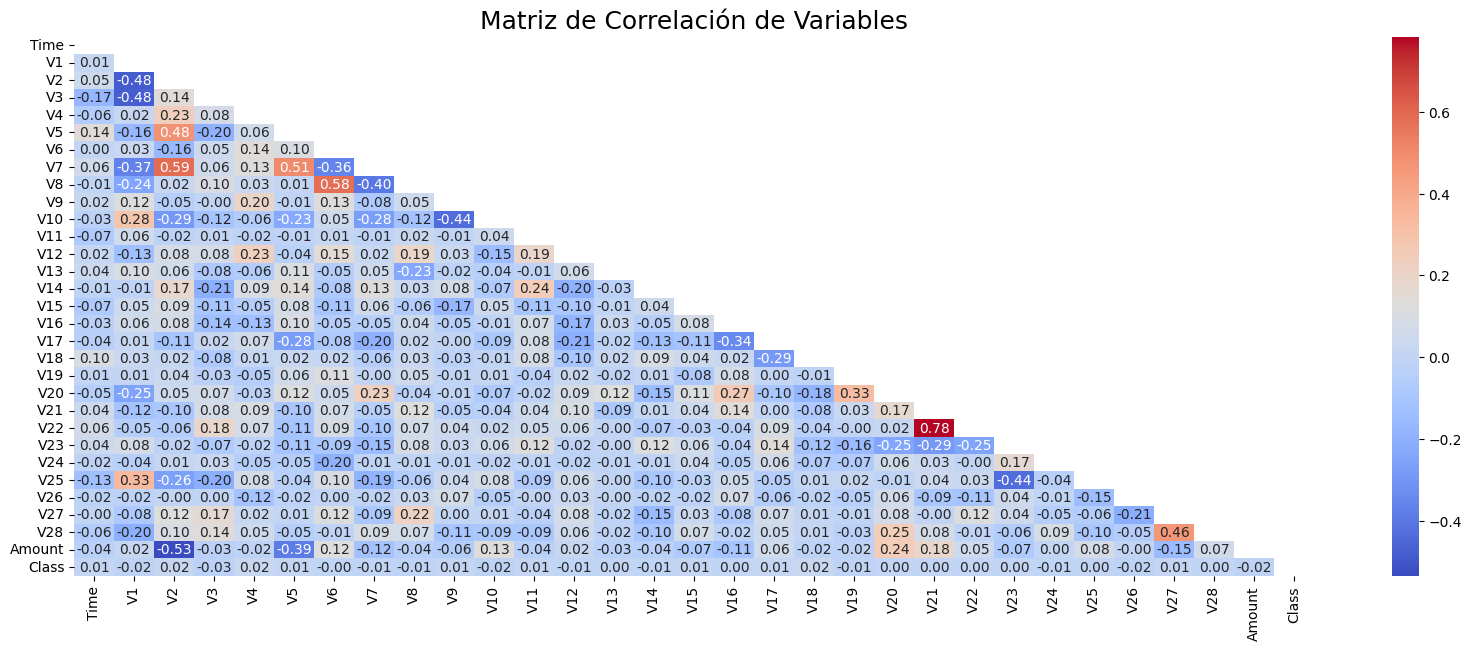

In [5]:
# Creo la matriz de correlacion
correlation_matrix = df1.corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix,dtype=bool))

#Ploteo
plt.figure(figsize=(20,7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title('Matriz de Correlación de Variables', size = 18)
plt.show()

La correlacion entre variables es baja, a excepción de las variables V21 y V22 que presentan un grado de 0.78. En caso de, al continuar el análisis, tener que reducir la cantidad de variables a utilizar, se podrá descartar una de estas dos por grado alto de multicolinealidad con la otra.

Respecto a la relación de las variables independientes con la variable dependiente, *"Class"*, y al no poder establecer un modelo de clasificación que dependa de 30 variables, se procederá a hacer una selección de variables, mediante el método *"Forward Feature Selection"*. 

Respecto a la correlación con la variable *"Class"* todas las variables presentan una correlación baja. Es esperable considerando el desbalance que existe entre valores de fraude y no fraude (contamos con menos de 400 valores de fraude en los más de 219 mil registros).

Teniendo esto en consideración, graficaremos las distribuciones de las variables de forma independiente para ver sus distribuciones y relación con la variable *"Class"*.

Consdierando que los histogramas y los gráficos que muestran las relaciones de cada V con la clase no están proporcionando la información deseada, se crean histogramas de los valores de cada V que corresponden a valores de Clase = 1 . Es decir, podremos ver las distribuciones de los valores de V para los cuales hay fraude.

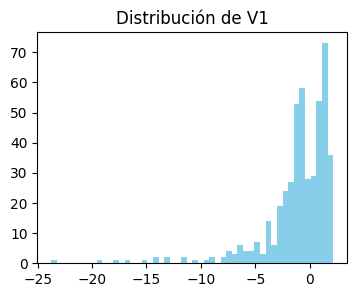

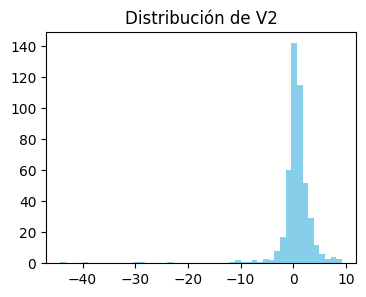

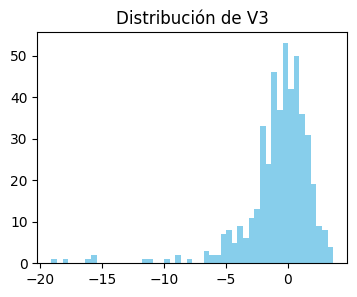

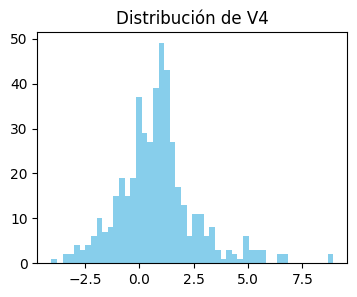

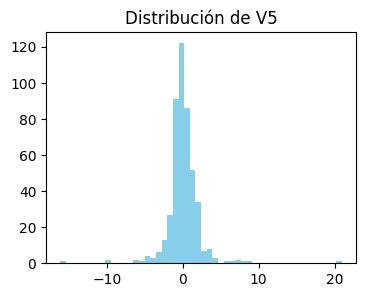

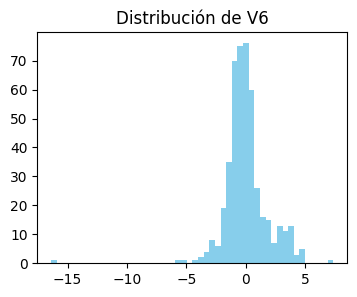

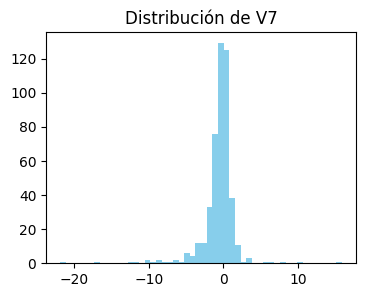

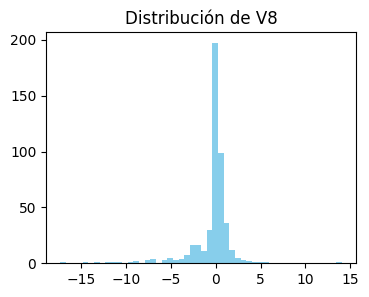

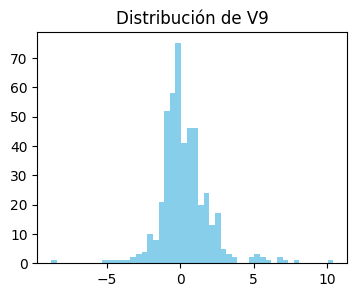

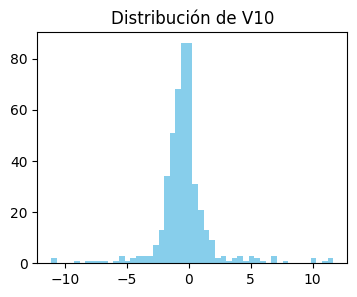

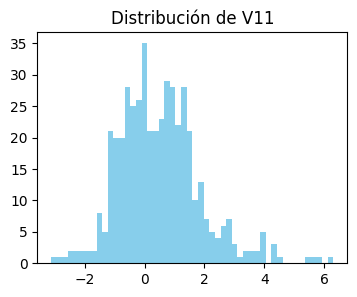

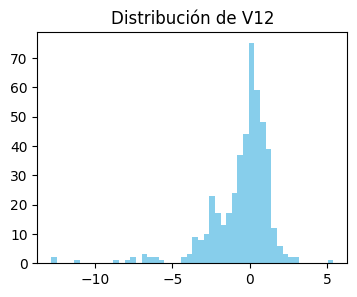

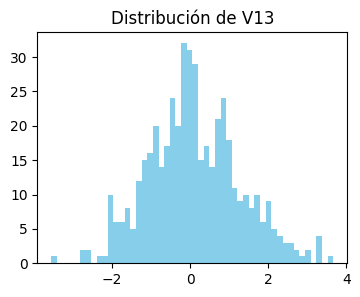

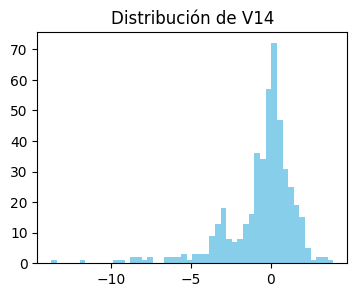

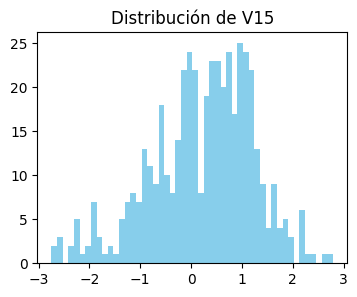

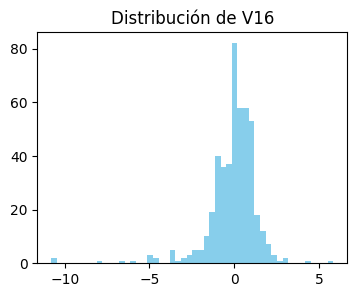

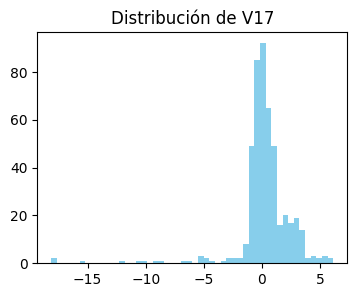

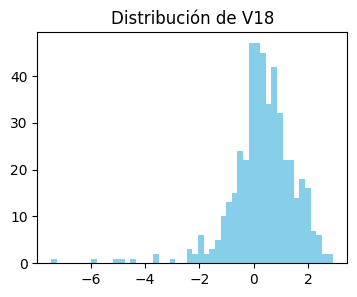

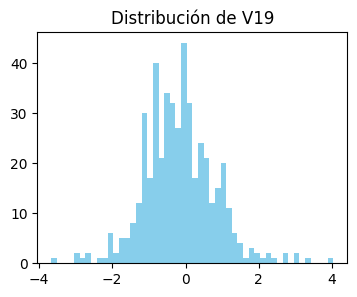

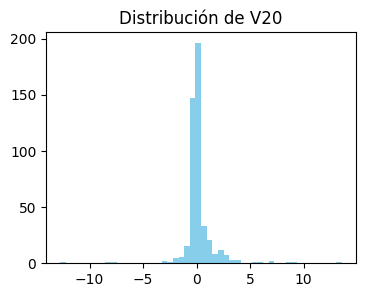

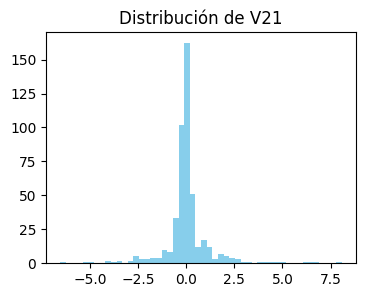

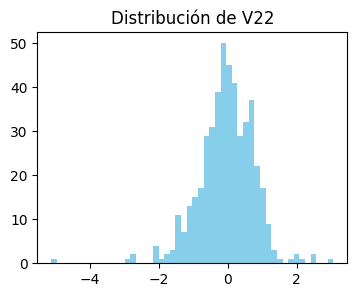

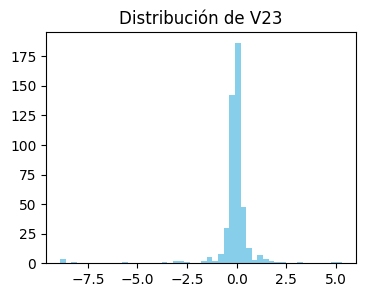

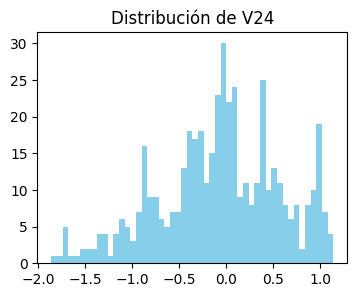

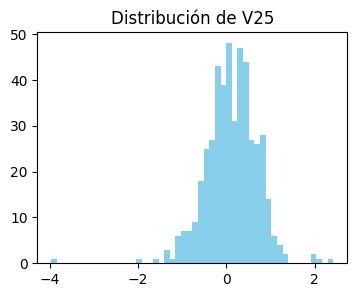

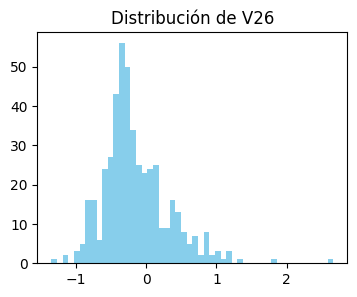

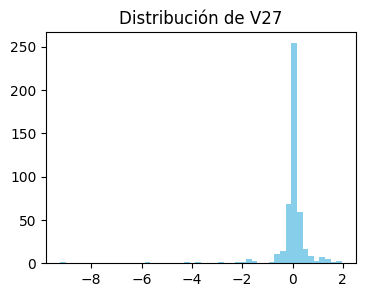

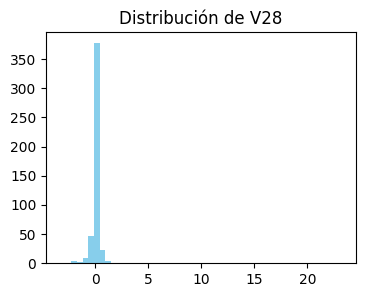

In [6]:
        
for col in df1.columns:
    #Filtrar las filas donde 'Class' es 1
    df_class_1 = df1[df1['Class'] == 1]
    
    # Filtrar columnas que comienzan con 'V'
    if col.startswith('V'):
        
        plt.figure(figsize=(4,3))
        plt.hist(df_class_1[col], bins=50, color='skyblue')
        plt.title(f'Distribución de {col}')
        plt.show()

Contamos con valores de fraudes de las variables con asimetría negativa, positiva y con distrbución normal. Por otro lado, hay algunos que no responden a ningun patrón detectable.


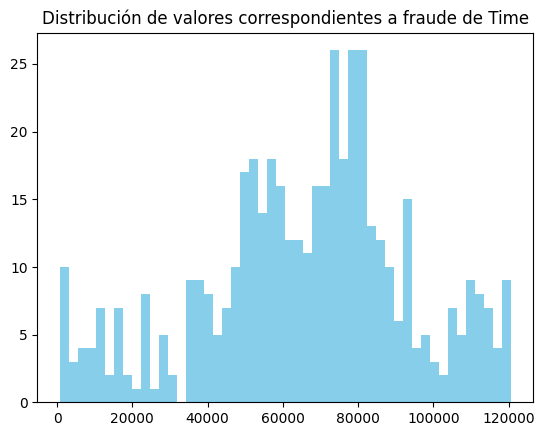

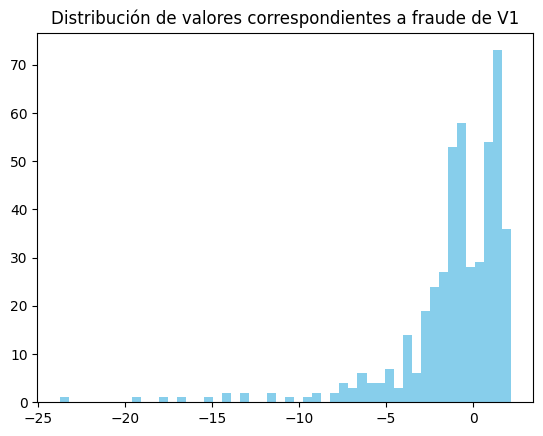

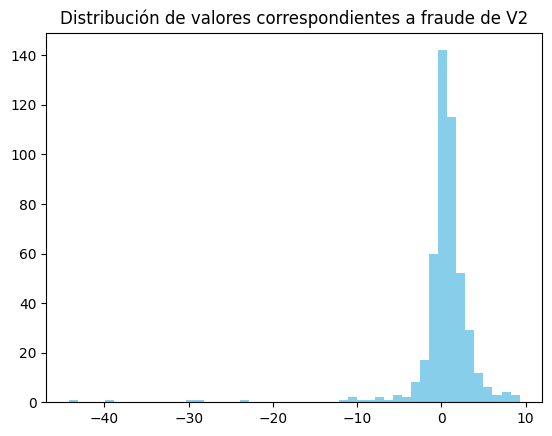

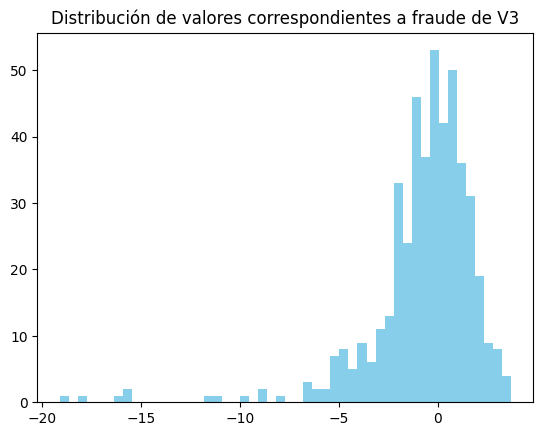

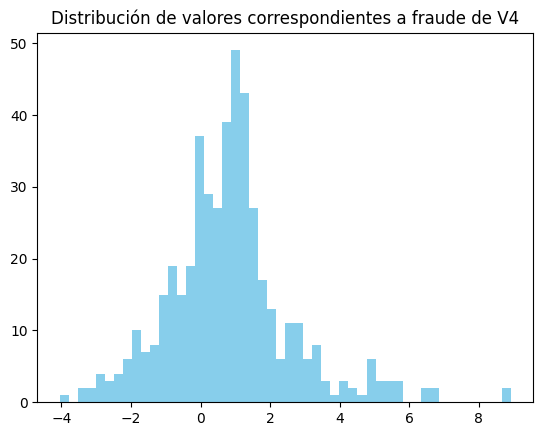

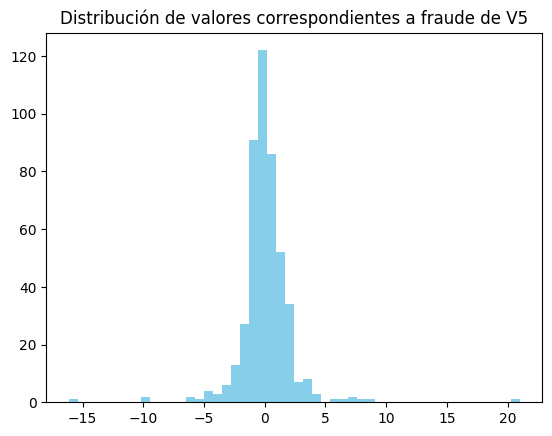

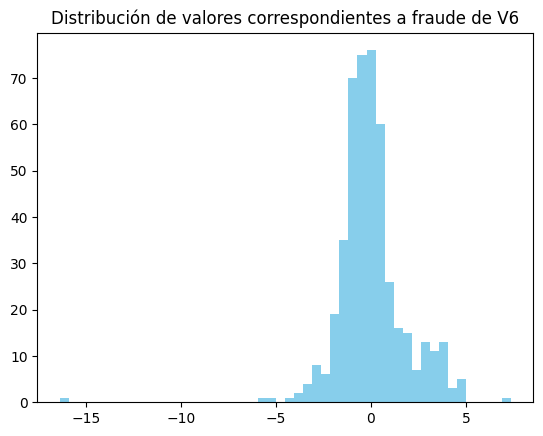

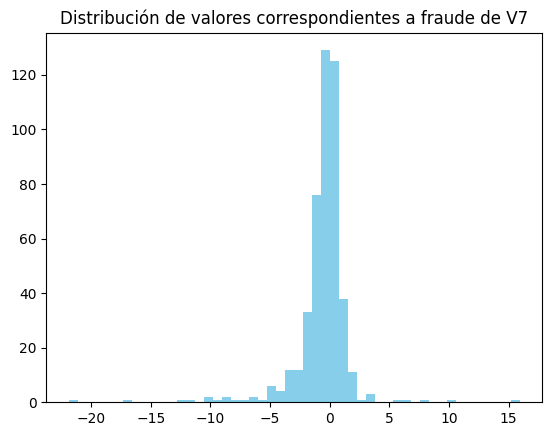

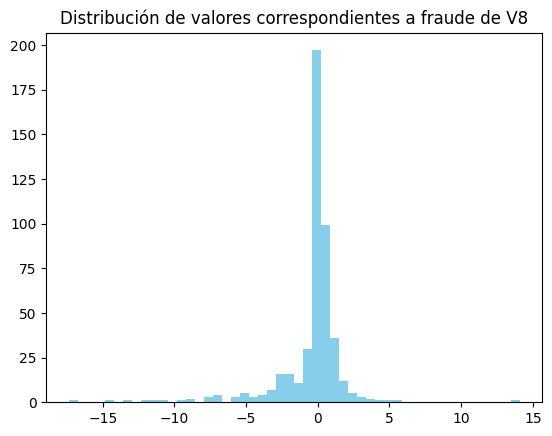

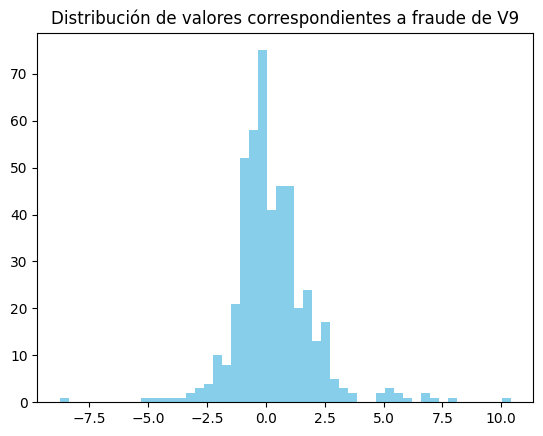

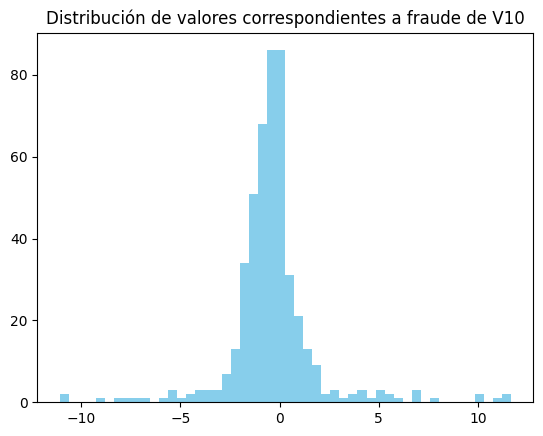

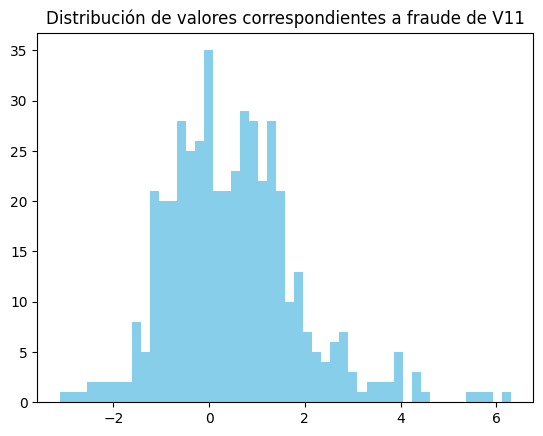

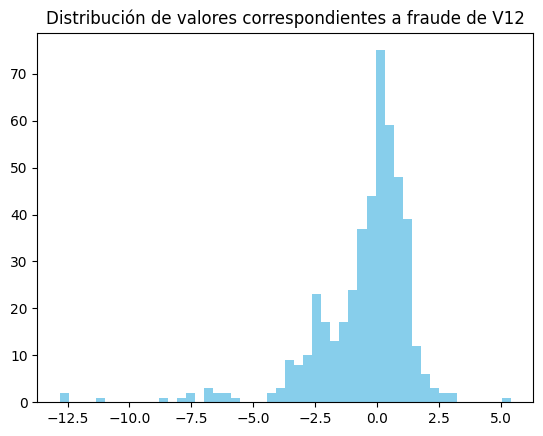

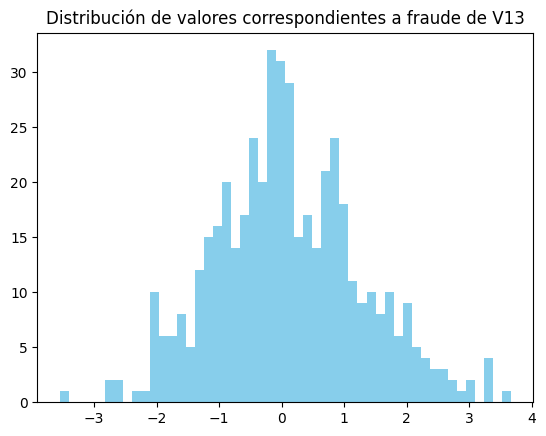

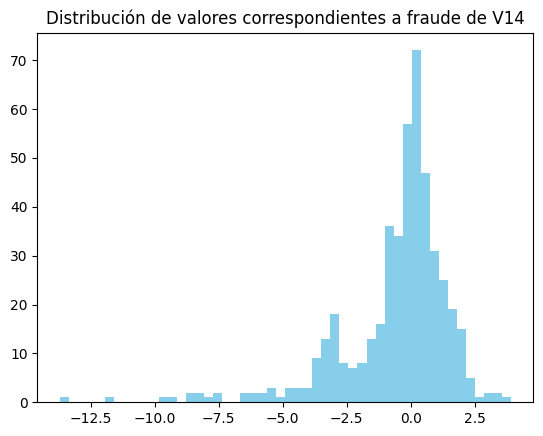

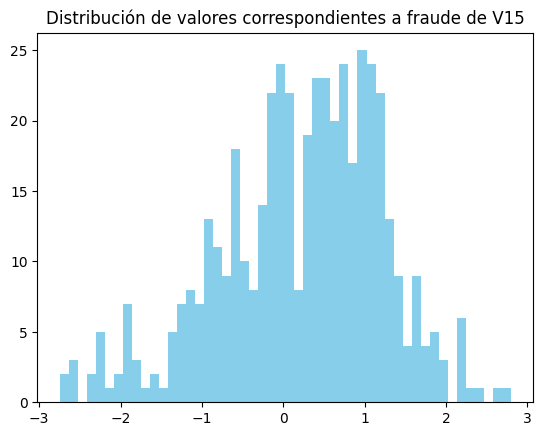

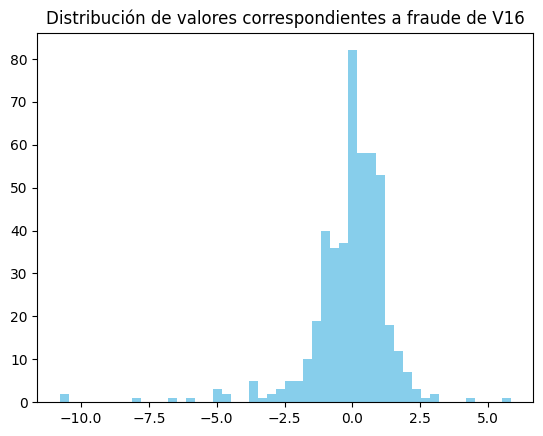

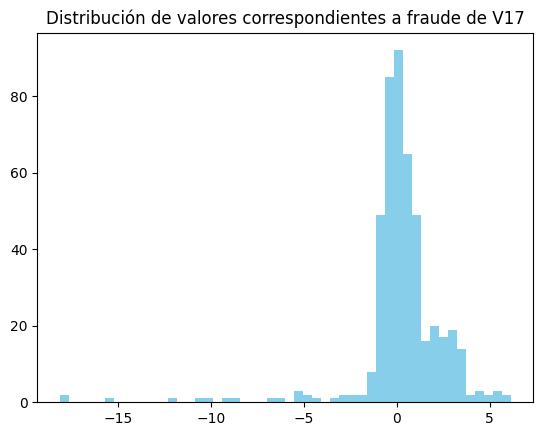

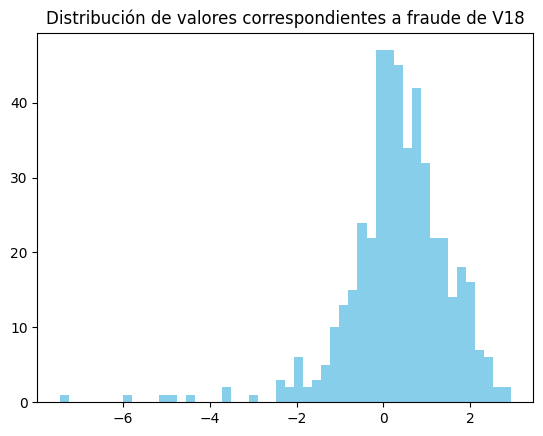

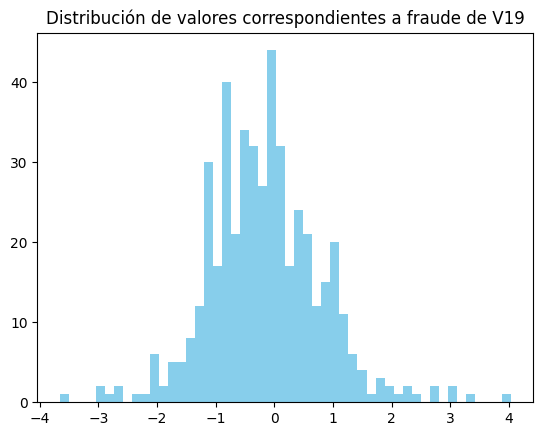

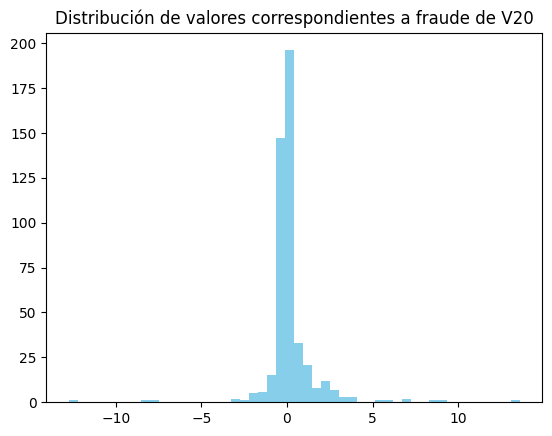

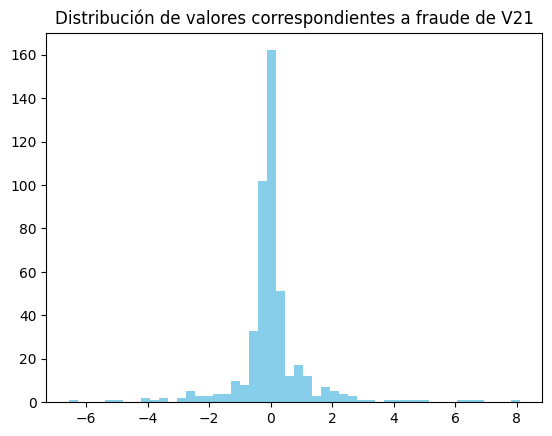

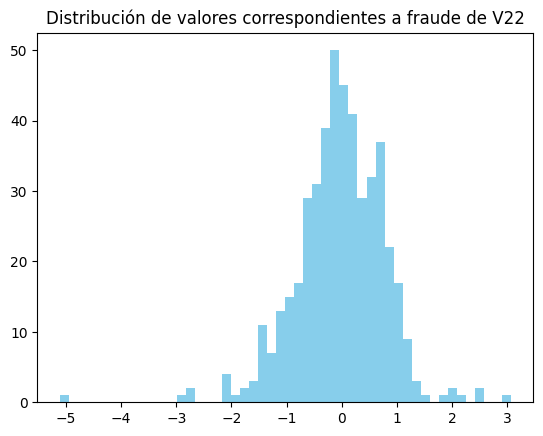

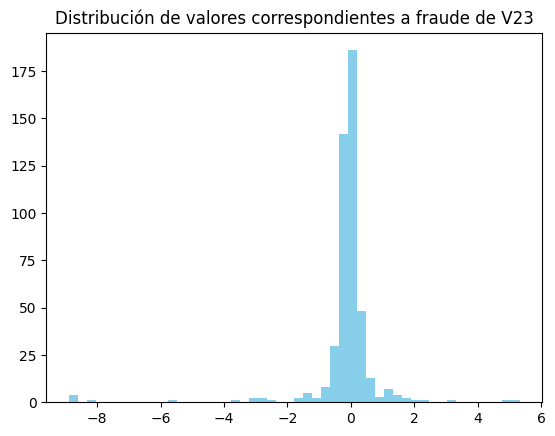

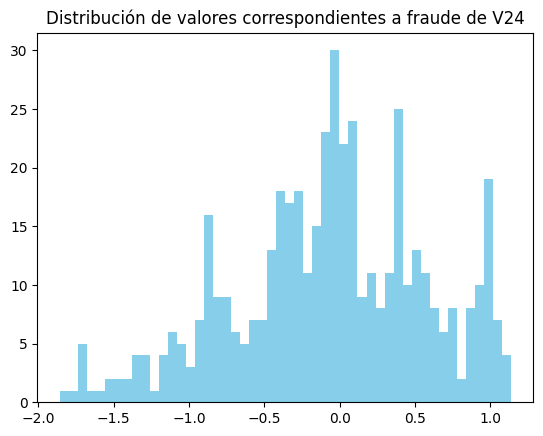

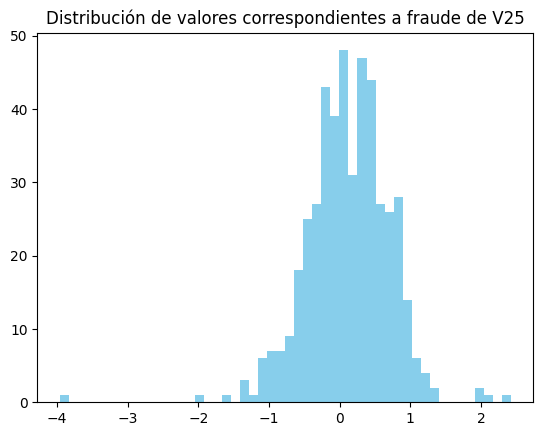

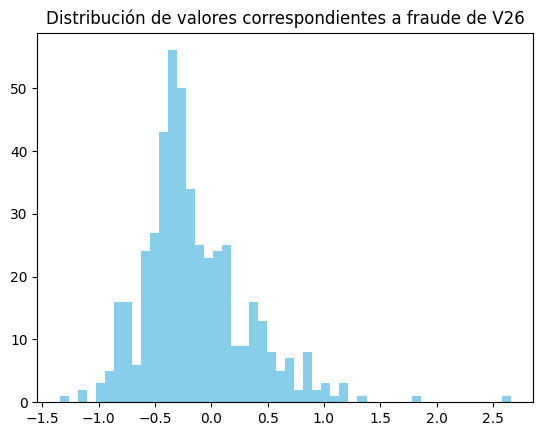

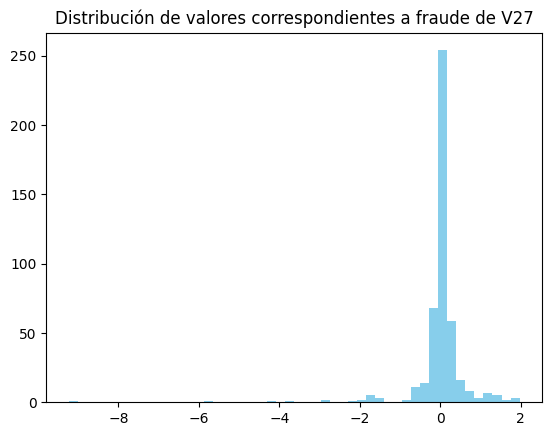

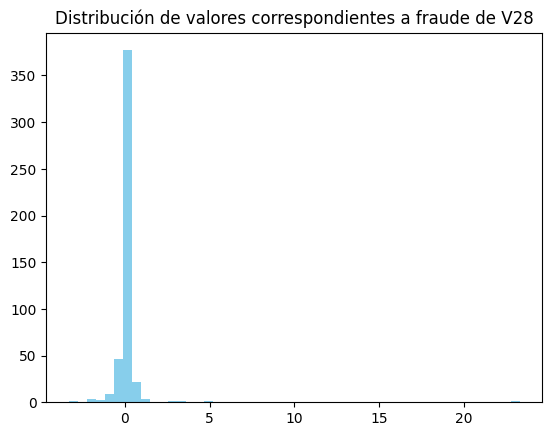

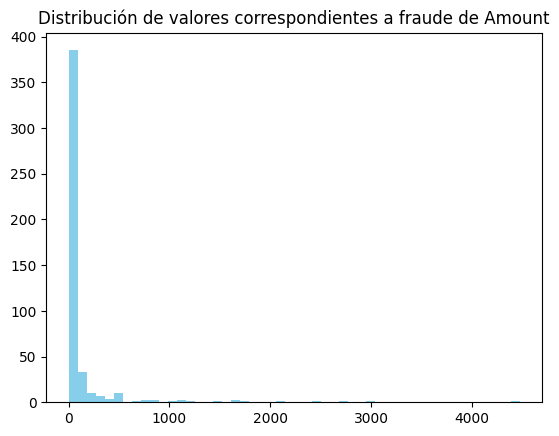

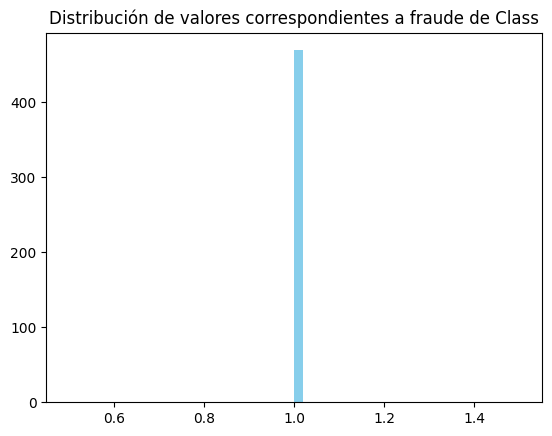

In [7]:
for col in df1.columns:
    #Filtrar las filas donde 'Class' es 1
    df_class_1 = df1[df1['Class'] == 1]
    
    plt.hist(df_class_1[col], bins=50, color='skyblue')
    plt.title(f'Distribución de valores correspondientes a fraude de {col}')
    plt.show()

Como podemos ver, contamos con outliers. Procedemos a graficar las variables con boxplots para determinar que valores de las variables constituyen outliers

<Axes: >

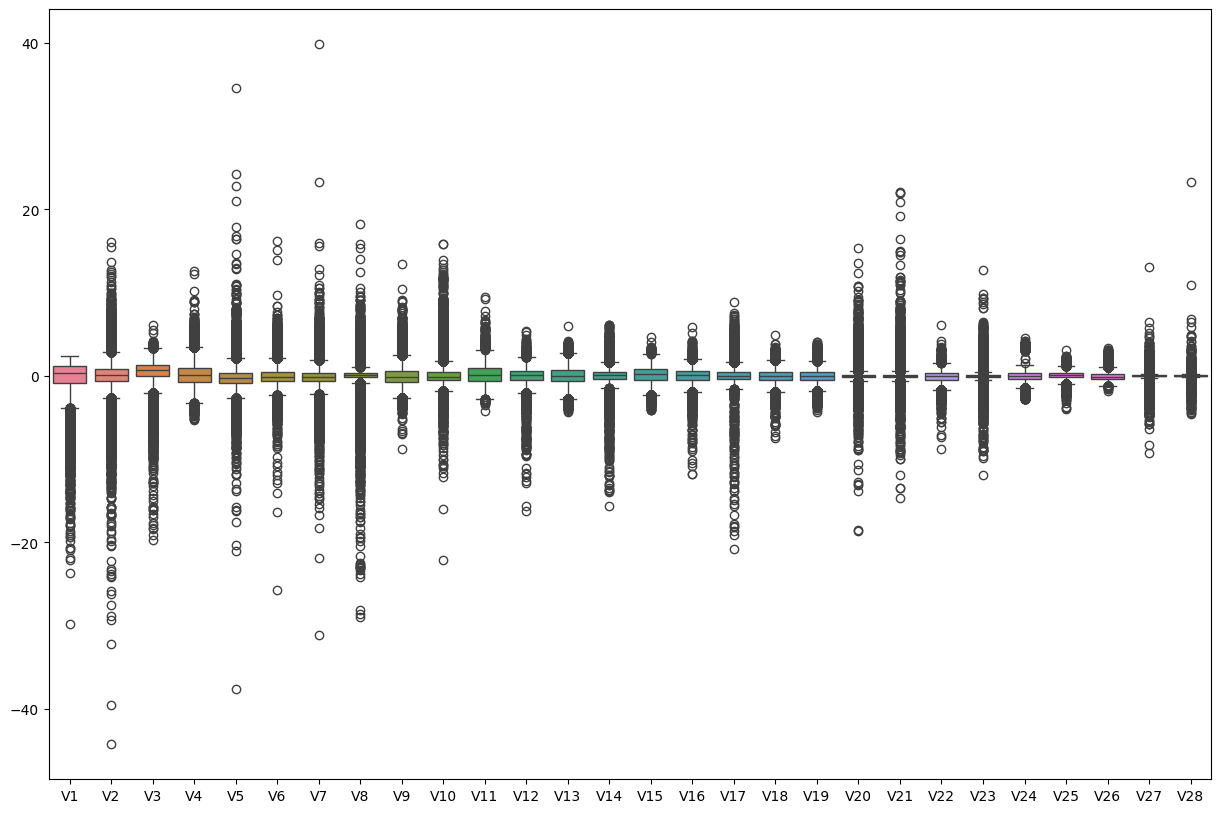

In [8]:
plt.figure(figsize = (15,10))
sns.boxplot(data=df1[[col for col in df1.columns if "V" in col]])

A pesar de detectar outliers de manera univariable, estos pueden estar aportando información útil al modelo, por lo que determinamos que no removerlos antes probar un primer modelo

In [9]:
X = df1.drop('Class', axis=1)
y = df1['Class']

In [10]:
xgb_params = {'n_estimators'     : 2000,
              'min_child_weight' : 96,
              'max_depth'        : 7,
              'learning_rate'    : 0.18,
              'subsample'        : 0.95,
              'colsample_bytree' : 0.95,
              'reg_lambda'       : 1.50,
              'reg_alpha'        : 1.50,
              'gamma'            : 1.50,
              'max_bin'          : 512,
              'random_state'     : 42,
              'objective'        : 'binary:logistic',
              'tree_method'      : 'hist',
              'eval_metric'      : 'auc'
             }

xgb_scores = []
feature_importance_list = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train , y_valid = y.iloc[train_idx] , y.iloc[valid_idx]
    
    xgb_model = XGBClassifier(**xgb_params)
    xgb_model.fit(X_train, y_train,verbose=0)
    
    y_pred = xgb_model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid,  y_pred)
    xgb_scores.append(auc)
    print(115*'-')
    print(f"\nFold: {fold+1}, AUC score: {auc:.2f}\n")
    print(115*'-')
    
    # Guardar la importancia de las características para este fold
    feature_importance_list.append(xgb_model.feature_importances_)
    
print("Mean AUC :", np.mean(xgb_scores))

-------------------------------------------------------------------------------------------------------------------

Fold: 1, AUC score: 0.81

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 2, AUC score: 0.84

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 3, AUC score: 0.80

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 4, AUC score: 0.79

--------------------------------------------------------------------------------

In [11]:
# Calcular la importancia media de las características
mean_feature_importance = np.mean(feature_importance_list, axis=0)

# Obtener nombres de características
feature_names = X.columns

# Crear un DataFrame para mostrar las importancias de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': mean_feature_importance})
# Ordenar por importancia de las características
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

   Feature  Importance
3       V3    0.108397
2       V2    0.087246
14     V14    0.074626
10     V10    0.073626
8       V8    0.048398
18     V18    0.048351
4       V4    0.046175
1       V1    0.041964
29  Amount    0.037321
7       V7    0.032251
9       V9    0.030338
26     V26    0.030307
12     V12    0.027343
19     V19    0.025123
21     V21    0.024283
17     V17    0.022651
24     V24    0.020751
11     V11    0.019180
28     V28    0.019057
16     V16    0.018791
27     V27    0.017786
6       V6    0.017644
5       V5    0.017261
13     V13    0.017182
15     V15    0.017087
0     Time    0.016475
22     V22    0.015847
23     V23    0.015609
25     V25    0.014831
20     V20    0.014098


Procedemos a graficar las variables de acuerdo a su importancia, en orden de mayor a menor, y luego buscaremos las relaciones entre aquellas cuya importancia supere el 3% (las primeras 10)

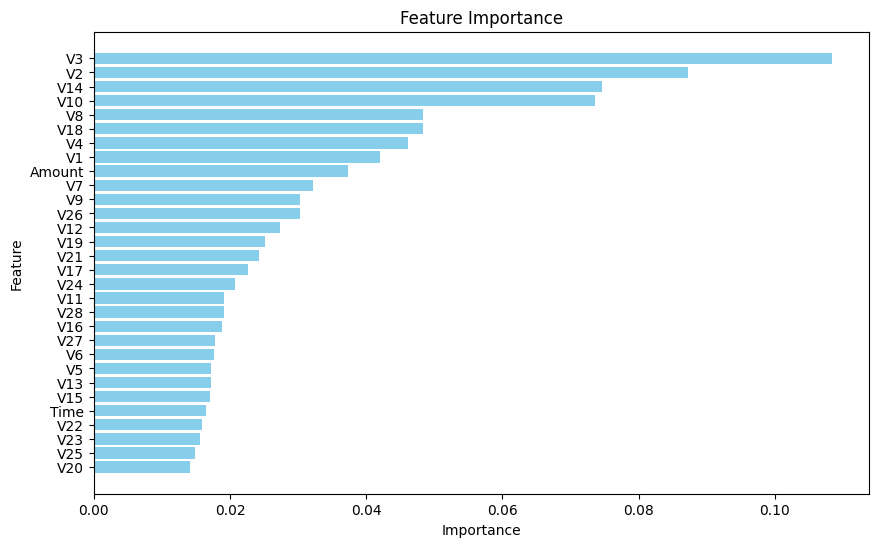

In [12]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

Procedemos a hacer un análisis bivariado de las 10 variables más importantes

Text(0.5, 0.98, 'V3 vs V2')

<Figure size 400x300 with 0 Axes>

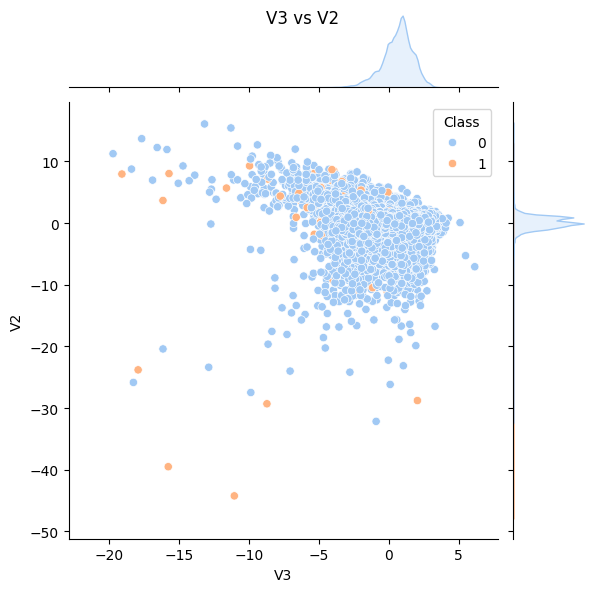

In [23]:
plt.figure(figsize=(4,3))
plot = sns.jointplot(x='V3', y='V2',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V3 vs V2")

Text(0.5, 0.98, 'V3 vs V2')

<Figure size 400x300 with 0 Axes>

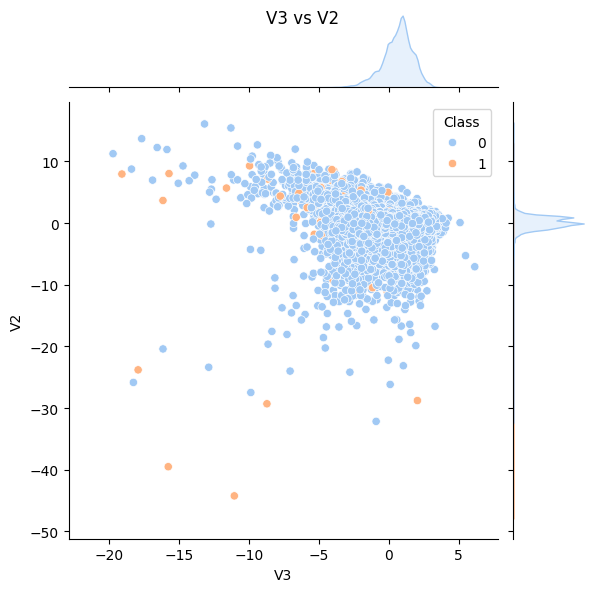

In [54]:
plt.figure(figsize=(4,3))
plot = sns.jointplot(x='V3', y='V2',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V3 vs V2")

Text(0.5, 0.98, 'V3 vs V14')

<Figure size 400x300 with 0 Axes>

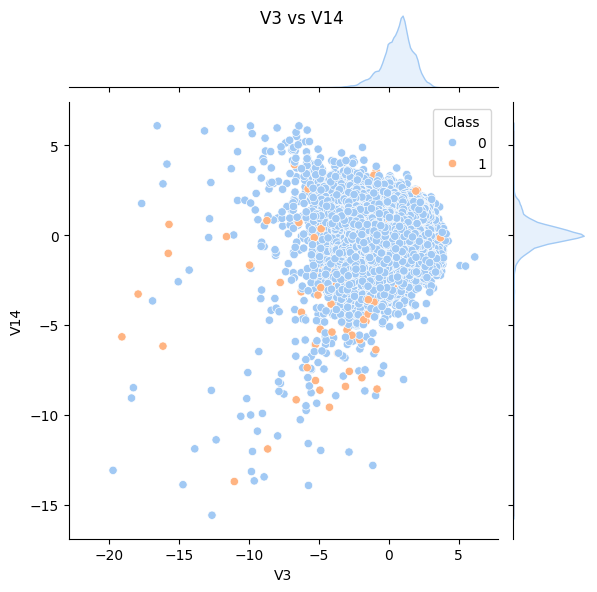

In [24]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V3', y='V14',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V3 vs V14")



Text(0.5, 0.98, 'V3 vs V10')

<Figure size 400x300 with 0 Axes>

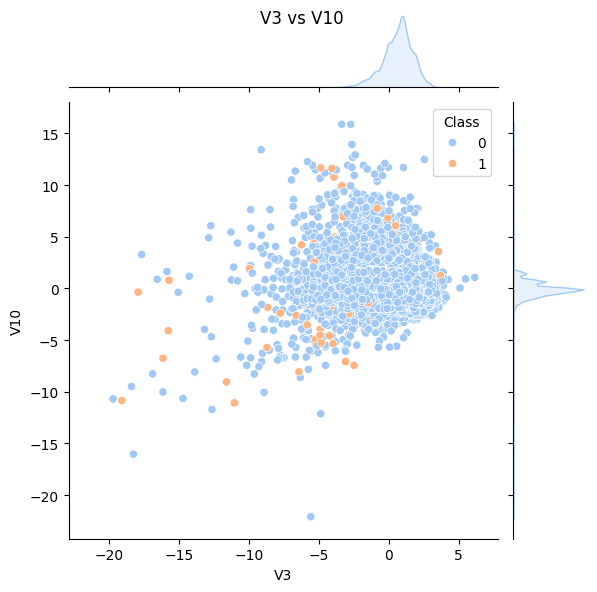

In [25]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V3', y='V10',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V3 vs V10")



Text(0.5, 0.98, 'V3 vs V8')

<Figure size 400x300 with 0 Axes>

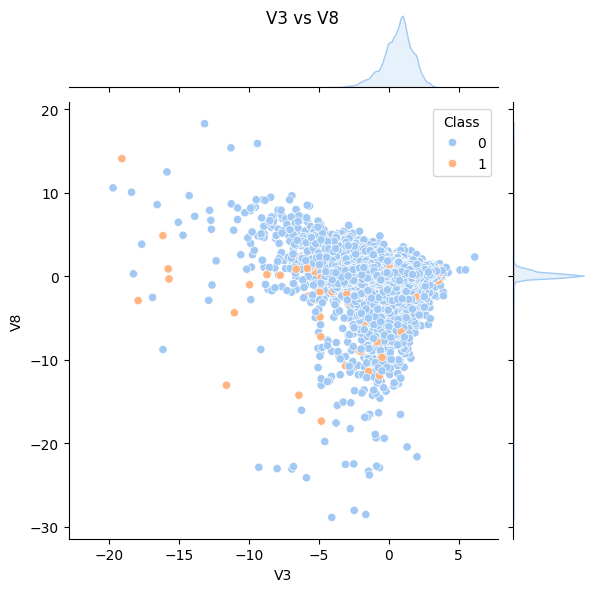

In [26]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V3', y='V8',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V3 vs V8")



Text(0.5, 0.98, 'V3 vs V18')

<Figure size 400x300 with 0 Axes>

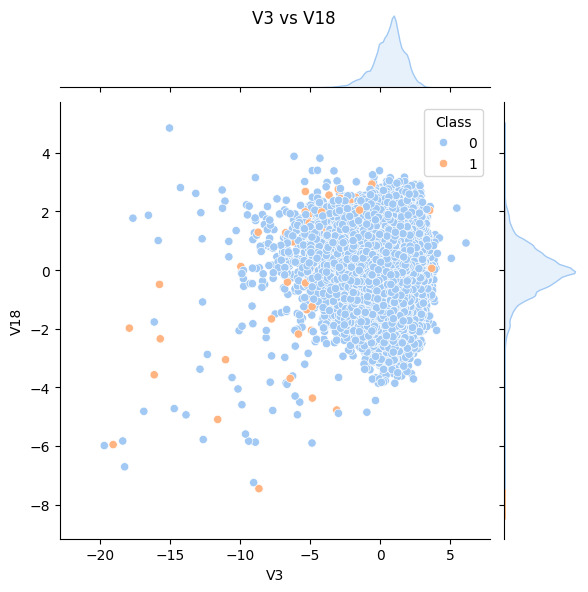

In [27]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V3', y='V18',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V3 vs V18")



Text(0.5, 0.98, 'V3 vs V4')

<Figure size 400x300 with 0 Axes>

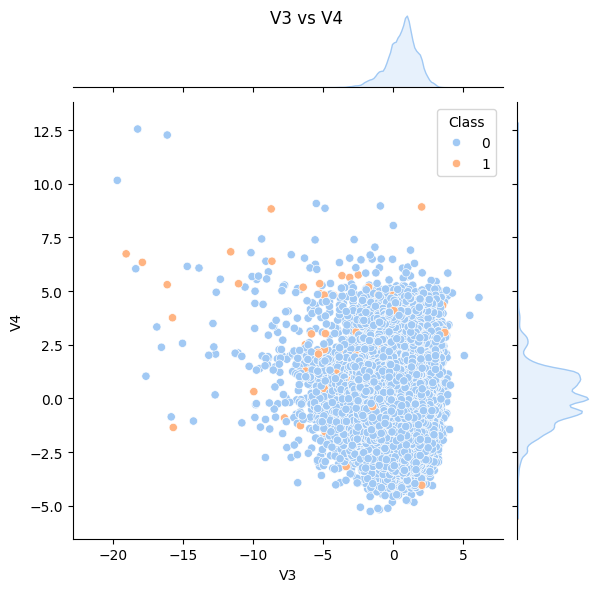

In [28]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V3', y='V4',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V3 vs V4")



Text(0.5, 0.98, 'V3 vs V1')

<Figure size 400x300 with 0 Axes>

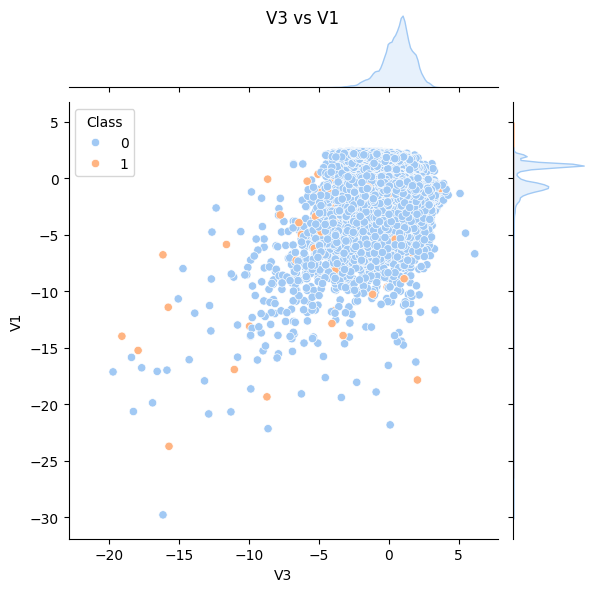

In [29]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V3', y='V1',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V3 vs V1")



Text(0.5, 0.98, 'V3 vs Amount')

<Figure size 400x300 with 0 Axes>

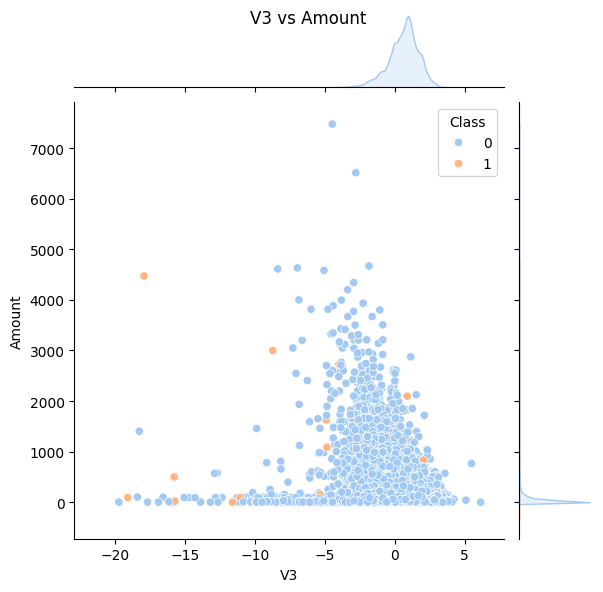

In [30]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V3', y='Amount',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V3 vs Amount")


<Figure size 400x300 with 0 Axes>

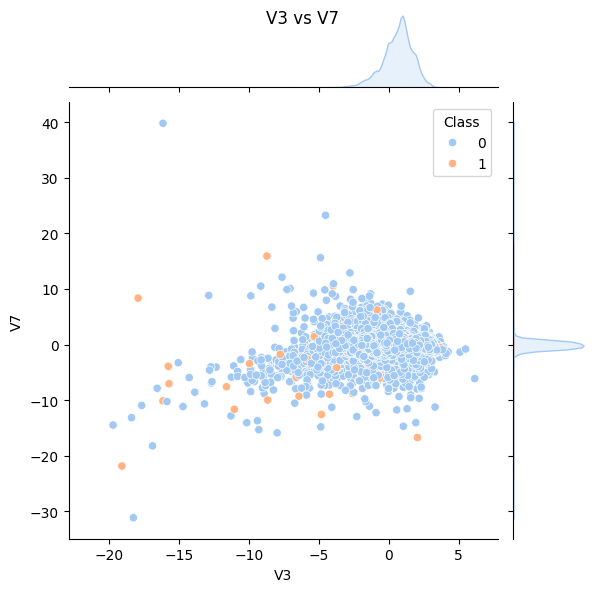

In [31]:

plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V3', y='V7',hue='Class', data=df1, palette ='pastel')
plot = plot.fig.suptitle("V3 vs V7")

Text(0.5, 0.98, 'V2 vs V14')

<Figure size 400x300 with 0 Axes>

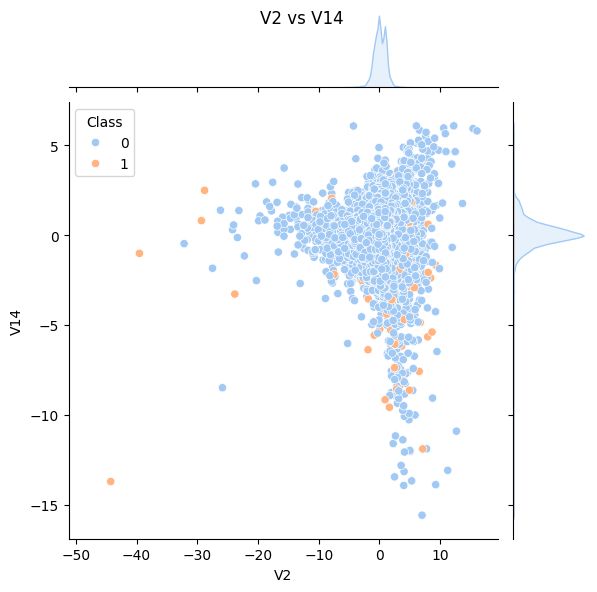

In [32]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V2', y='V14',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V2 vs V14")




Text(0.5, 0.98, 'V2 vs V10')

<Figure size 400x300 with 0 Axes>

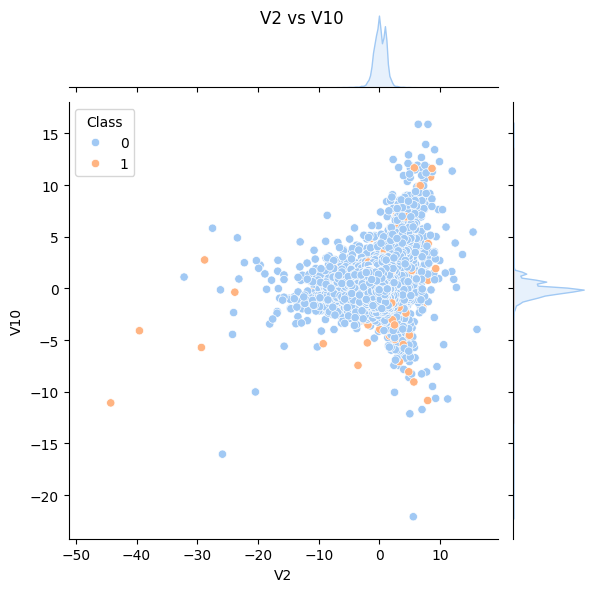

In [33]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V2', y='V10',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V2 vs V10")



Text(0.5, 0.98, 'V2 vs V8')

<Figure size 400x300 with 0 Axes>

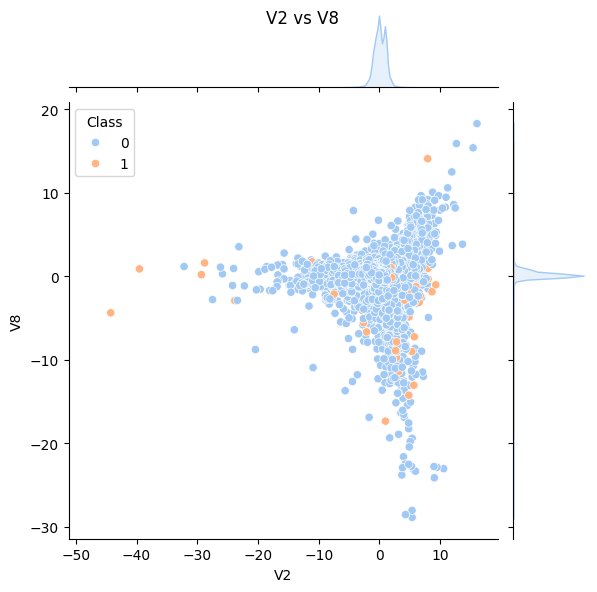

In [34]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V2', y='V8',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V2 vs V8")


Text(0.5, 0.98, 'V2 vs V18')

<Figure size 400x300 with 0 Axes>

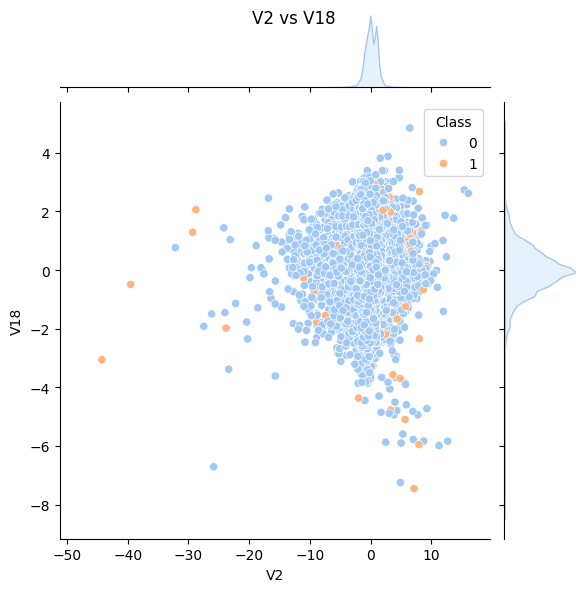

In [35]:

plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V2', y='V18',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V2 vs V18")


Text(0.5, 0.98, 'V2 vs V4')

<Figure size 400x300 with 0 Axes>

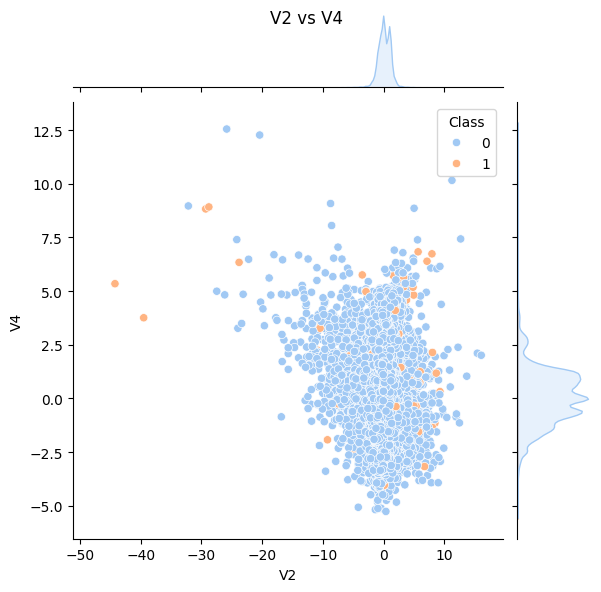

In [36]:

plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V2', y='V4',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V2 vs V4")



Text(0.5, 0.98, 'V2 vs V1')

<Figure size 400x300 with 0 Axes>

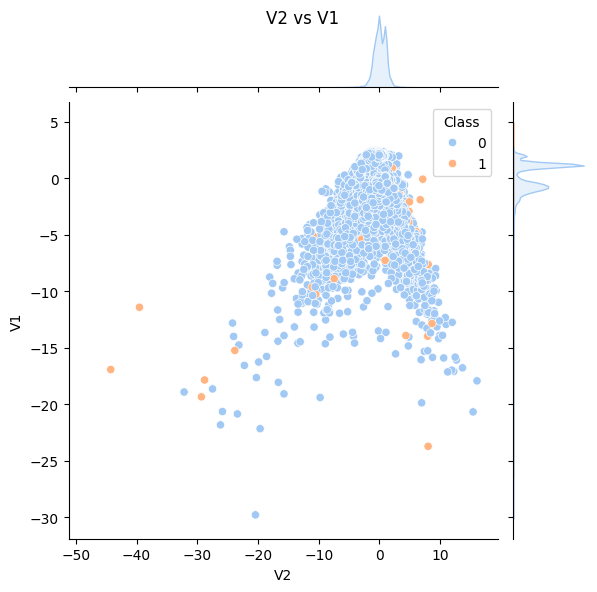

In [37]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V2', y='V1',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V2 vs V1")



Text(0.5, 0.98, 'V2 vs Amount')

<Figure size 400x300 with 0 Axes>

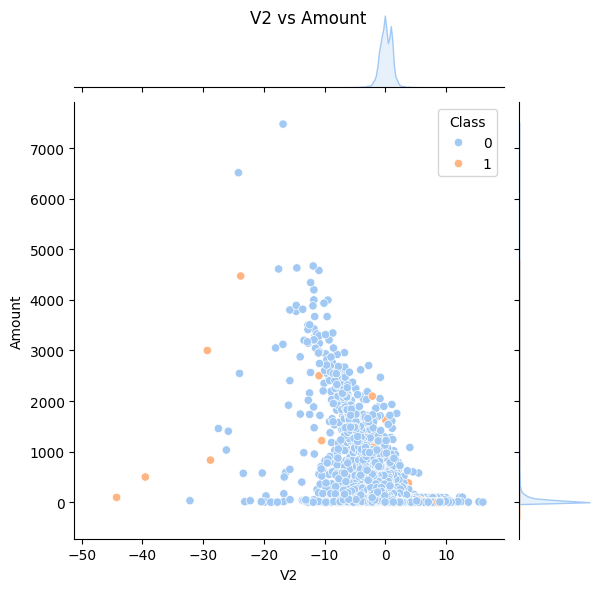

In [38]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V2', y='Amount',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V2 vs Amount")


Text(0.5, 0.98, 'V2 vs V7')

<Figure size 400x300 with 0 Axes>

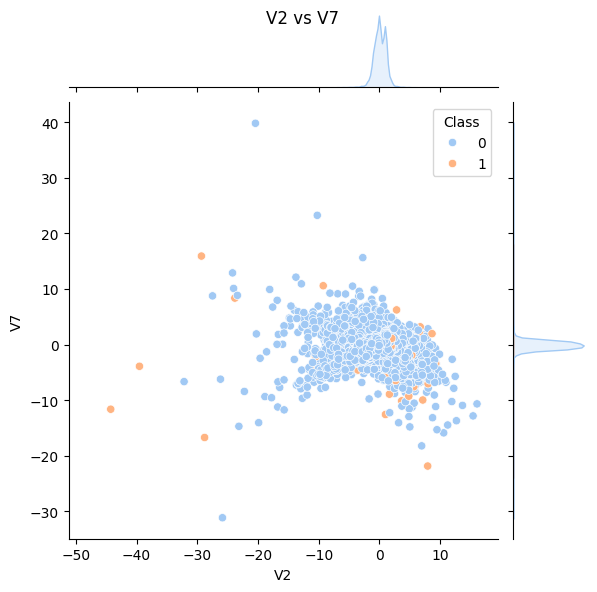

In [39]:

plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V2', y='V7',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V2 vs V7")

Text(0.5, 0.98, 'V14 vs V10')

<Figure size 200x150 with 0 Axes>

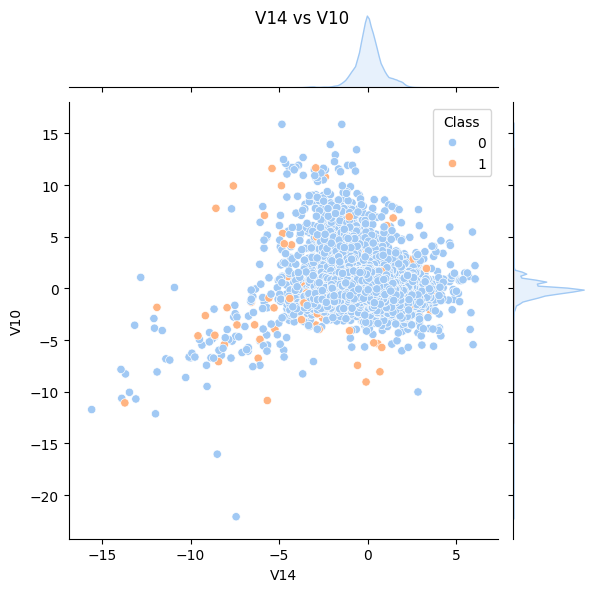

In [40]:
plt.figure(figsize=(2, 1.5))
plot = sns.jointplot(x='V14', y='V10',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V14 vs V10")



Text(0.5, 0.98, 'V14 vs V8')

<Figure size 400x300 with 0 Axes>

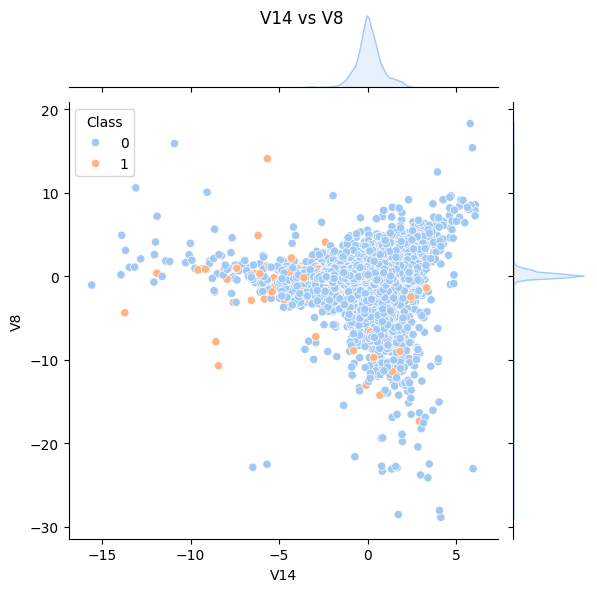

In [41]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V14', y='V8',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V14 vs V8")



Text(0.5, 0.98, 'V14 vs V18')

<Figure size 400x300 with 0 Axes>

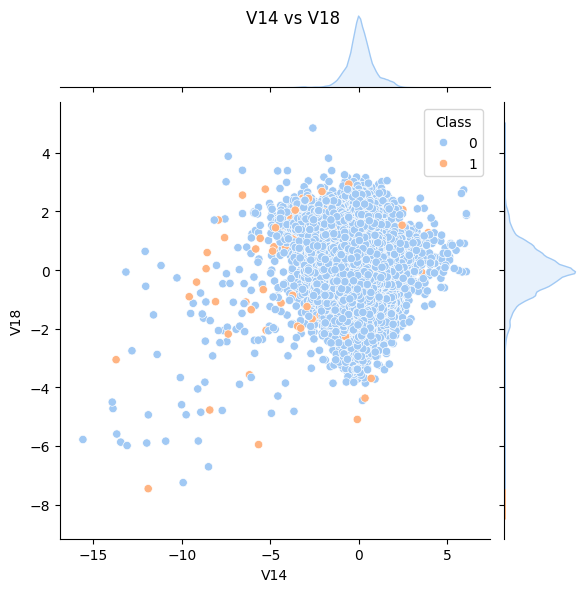

In [42]:

plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V14', y='V18',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V14 vs V18")



Text(0.5, 0.98, 'V14 vs V4')

<Figure size 400x300 with 0 Axes>

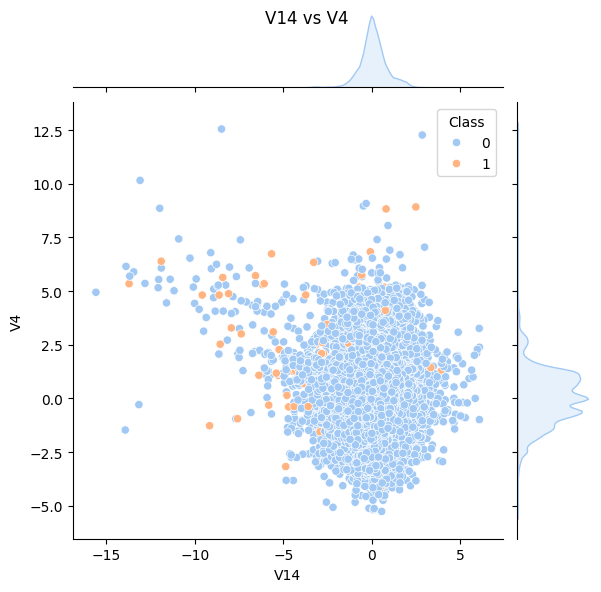

In [43]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V14', y='V4',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V14 vs V4")


Text(0.5, 0.98, 'V14 vs V1')

<Figure size 400x300 with 0 Axes>

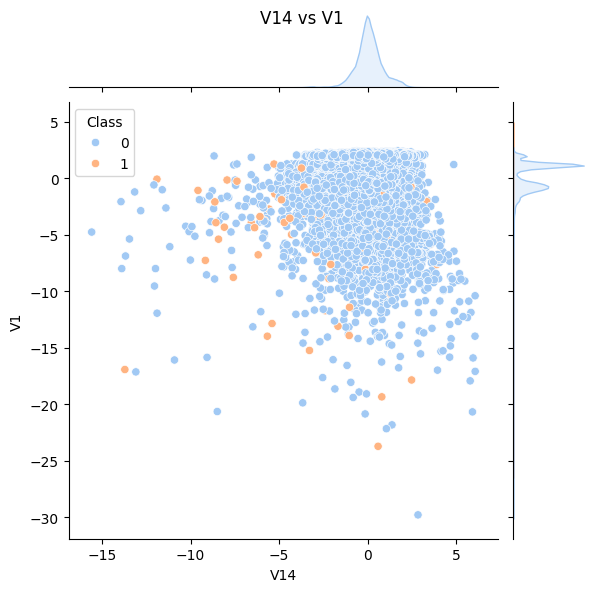

In [44]:

plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V14', y='V1',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V14 vs V1")



Text(0.5, 0.98, 'V14 vs Amount')

<Figure size 400x300 with 0 Axes>

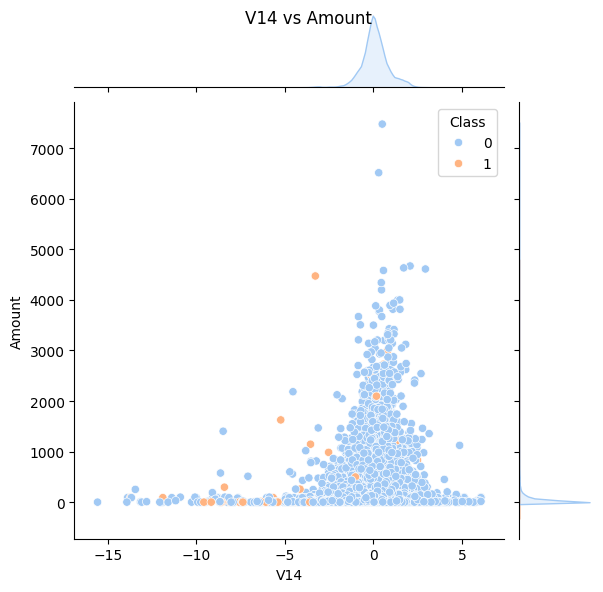

In [45]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V14', y='Amount',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V14 vs Amount")


Text(0.5, 0.98, 'V14 vs V7')

<Figure size 400x300 with 0 Axes>

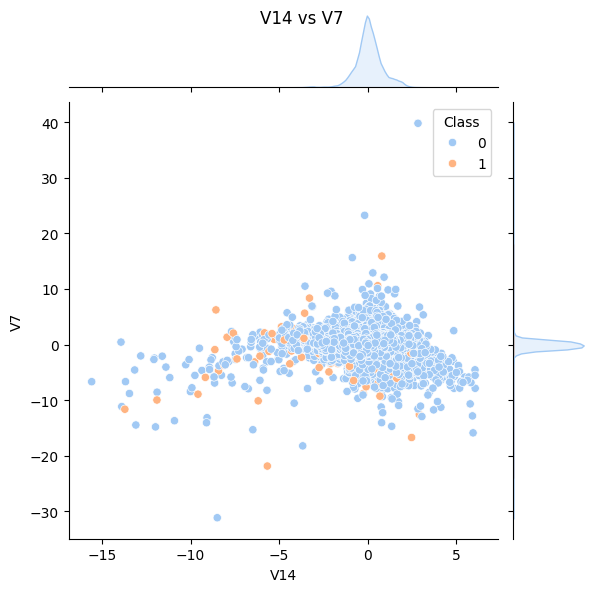

In [46]:

plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V14', y='V7',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V14 vs V7")

Text(0.5, 0.98, 'V10 vs V8')

<Figure size 400x300 with 0 Axes>

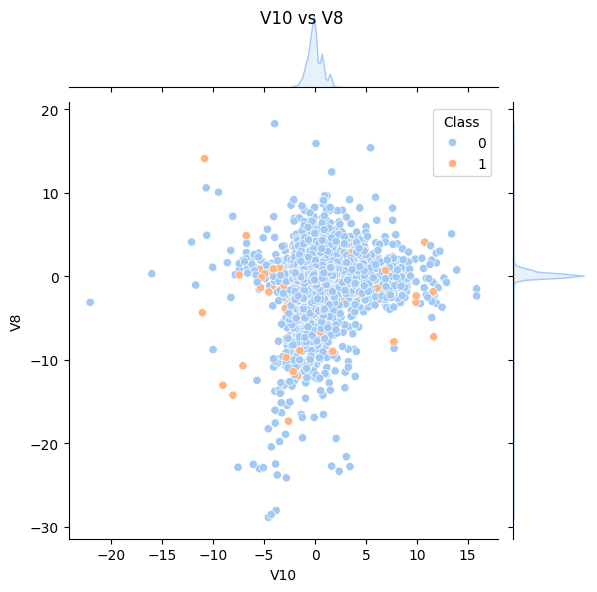

In [47]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V10', y='V8',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V10 vs V8")


              


Text(0.5, 0.98, 'V10 vs V18')

<Figure size 400x300 with 0 Axes>

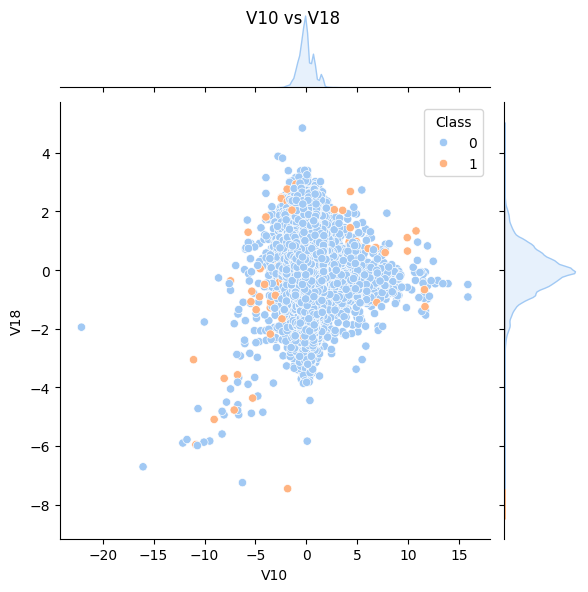

In [48]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V10', y='V18',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V10 vs V18")



Text(0.5, 0.98, 'V10 vs V4')

<Figure size 400x300 with 0 Axes>

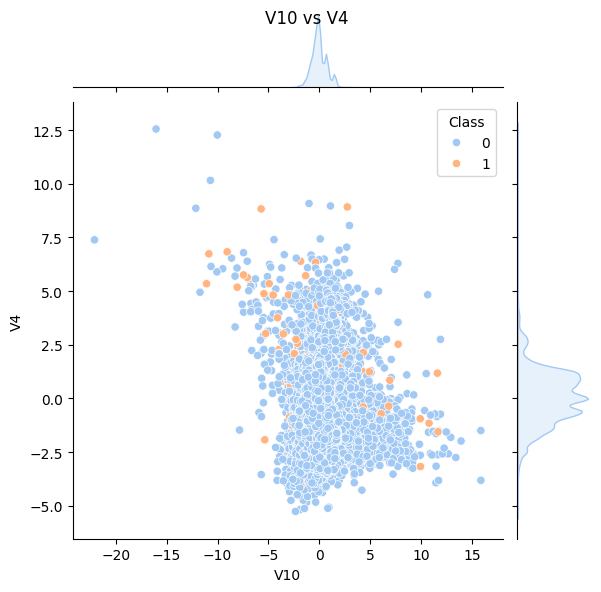

In [49]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V10', y='V4',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V10 vs V4")



Text(0.5, 0.98, 'V10 vs V1')

<Figure size 400x300 with 0 Axes>

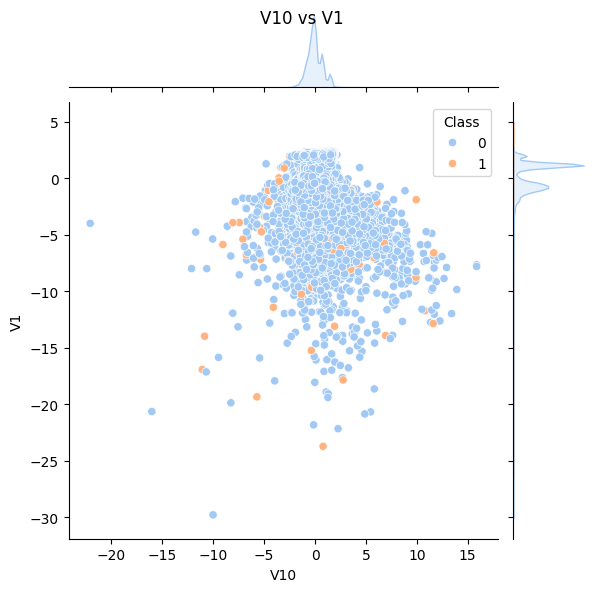

In [50]:
plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V10', y='V1',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V10 vs V1")


Text(0.5, 0.98, 'V10 vs Amount')

<Figure size 400x300 with 0 Axes>

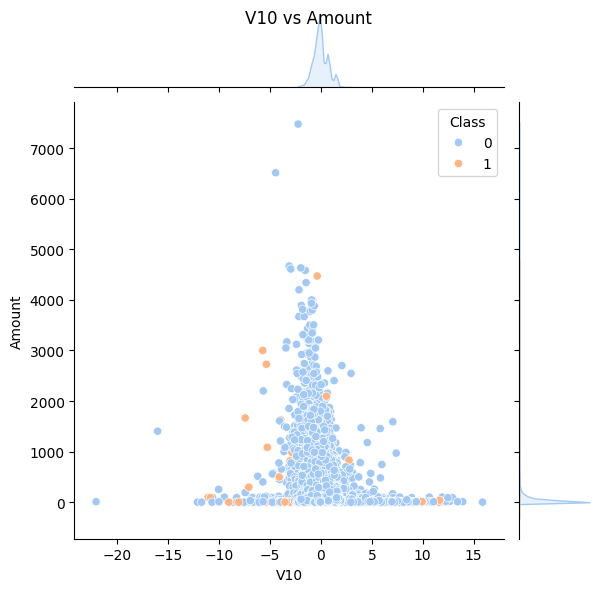

In [51]:

plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V10', y='Amount',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V10 vs Amount")


Text(0.5, 0.98, 'V10 vs V7')

<Figure size 400x300 with 0 Axes>

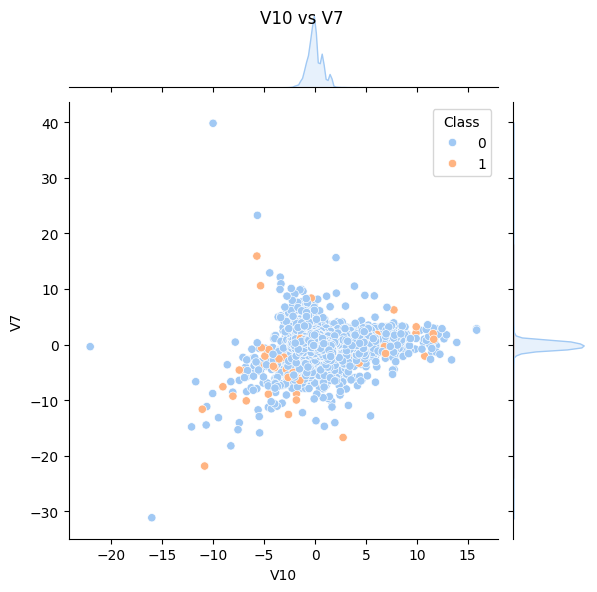

In [52]:

plt.figure(figsize=(4, 3))
plot = sns.jointplot(x='V10', y='V7',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V10 vs V7")

Text(0.5, 0.98, 'V8 vs V18')

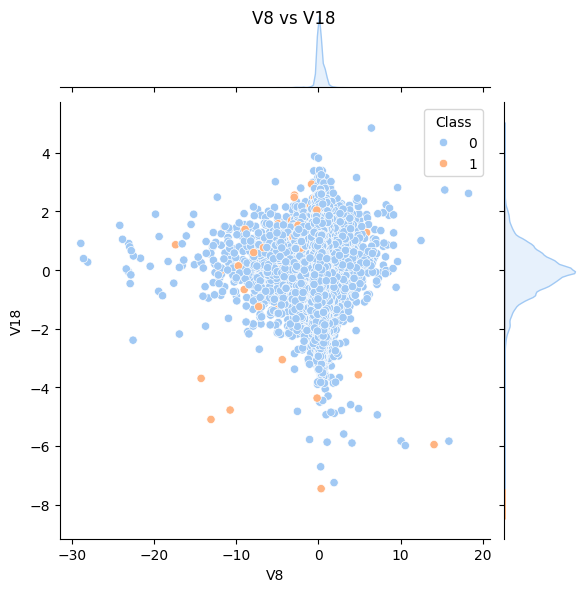

In [55]:
plot = sns.jointplot(x='V8', y='V18',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V8 vs V18")



Text(0.5, 0.98, 'V8 vs V4')

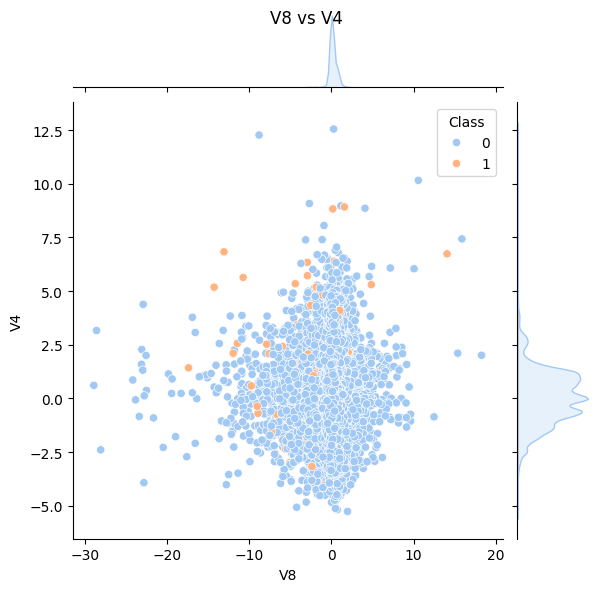

In [56]:
plot = sns.jointplot(x='V8', y='V4',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V8 vs V4")


Text(0.5, 0.98, 'V8 vs V1')

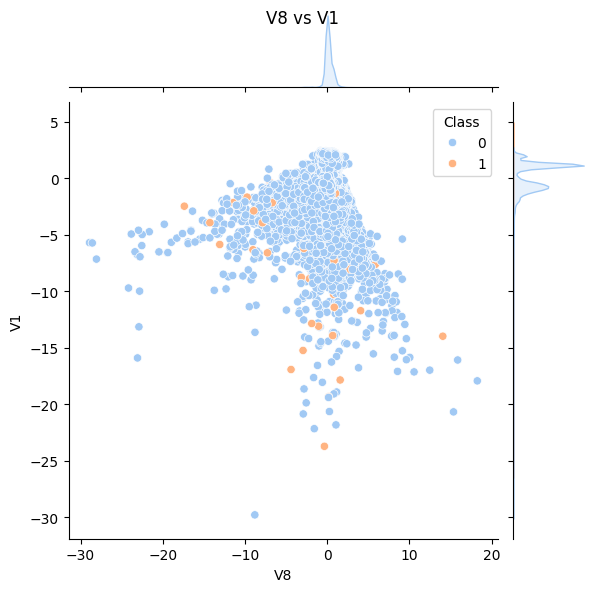

In [57]:
plot = sns.jointplot(x='V8', y='V1',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V8 vs V1")


Text(0.5, 0.98, 'V8 vs Amount')

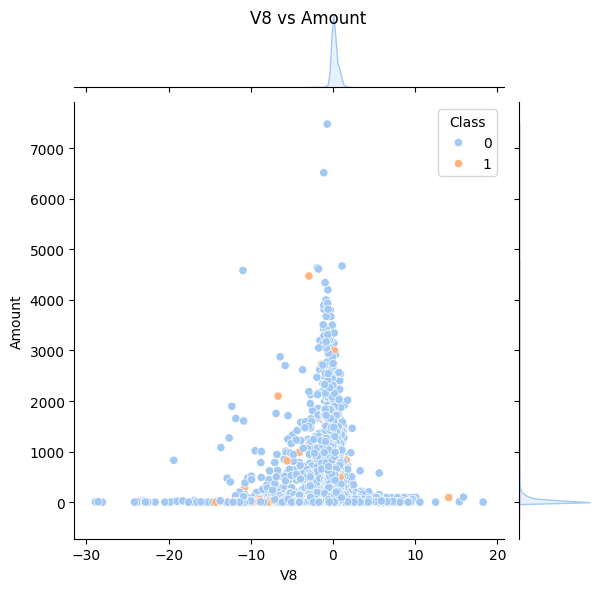

In [58]:
plot = sns.jointplot(x='V8', y='Amount',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V8 vs Amount")


Text(0.5, 0.98, 'V8 vs V7')

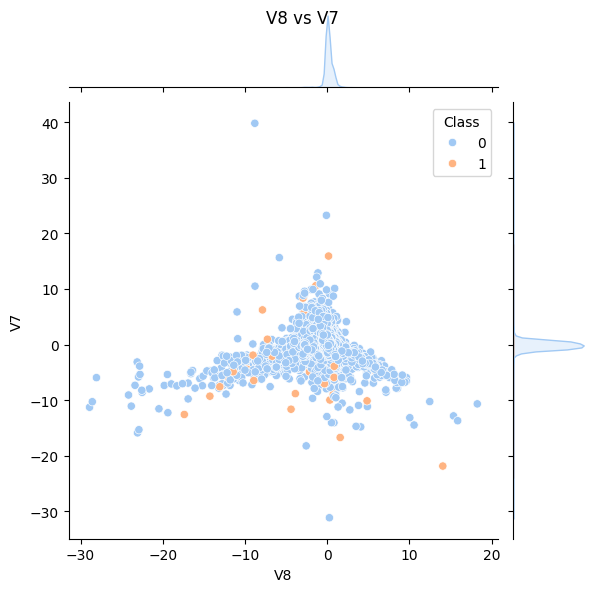

In [59]:
plot = sns.jointplot(x='V8', y='V7',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V8 vs V7")

Text(0.5, 0.98, 'V18 vs V4')

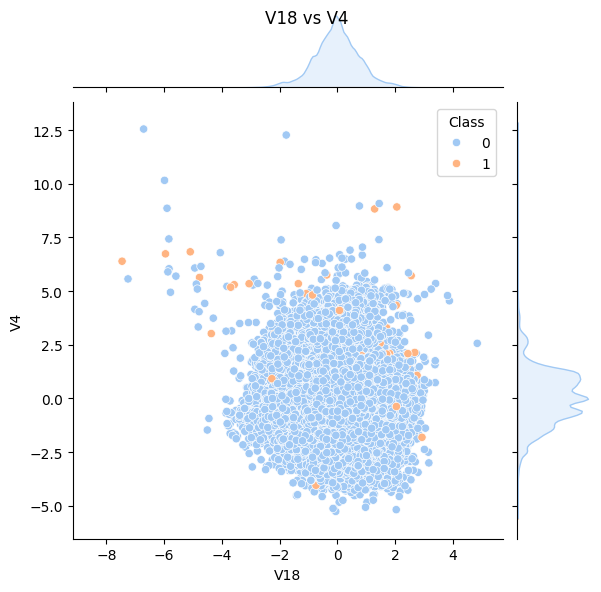

In [60]:
              
plot = sns.jointplot(x='V18', y='V4',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V18 vs V4")



Text(0.5, 0.98, 'V18 vs V1')

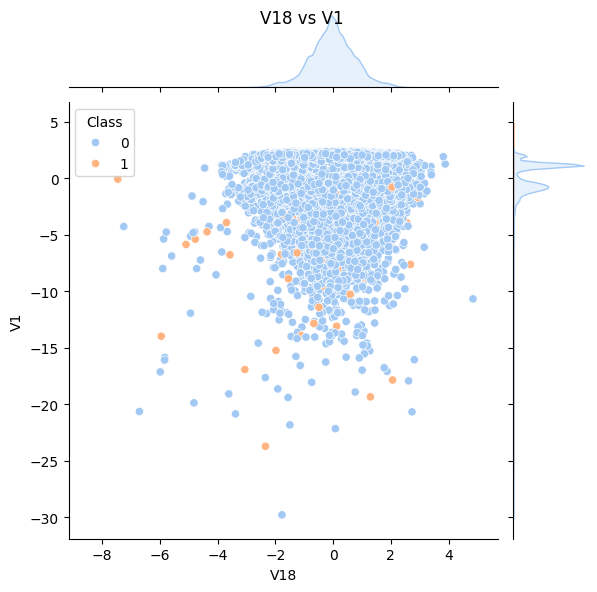

In [61]:
plot = sns.jointplot(x='V18', y='V1',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V18 vs V1")


Text(0.5, 0.98, 'V18 vs Amount')

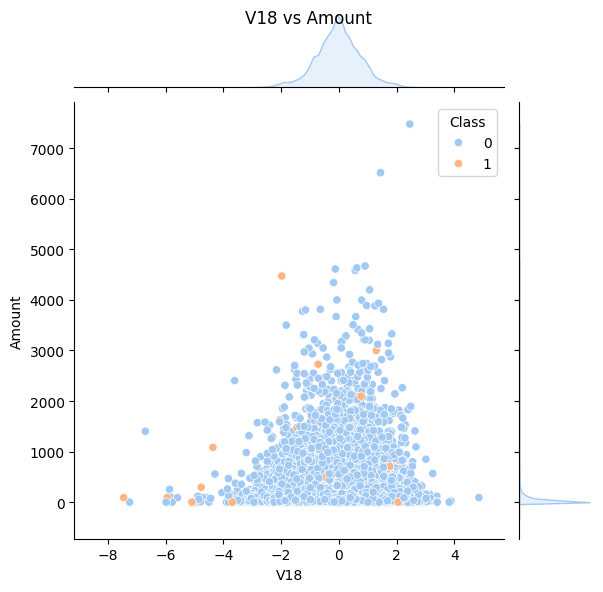

In [62]:
plot = sns.jointplot(x='V18', y='Amount',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V18 vs Amount")


Text(0.5, 0.98, 'V18 vs V7')

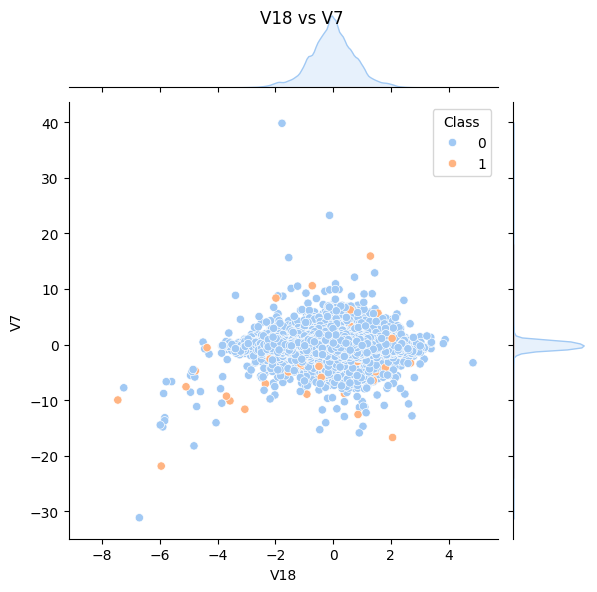

In [63]:
plot = sns.jointplot(x='V18', y='V7',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V18 vs V7")

Text(0.5, 0.98, 'V4 vs V1')

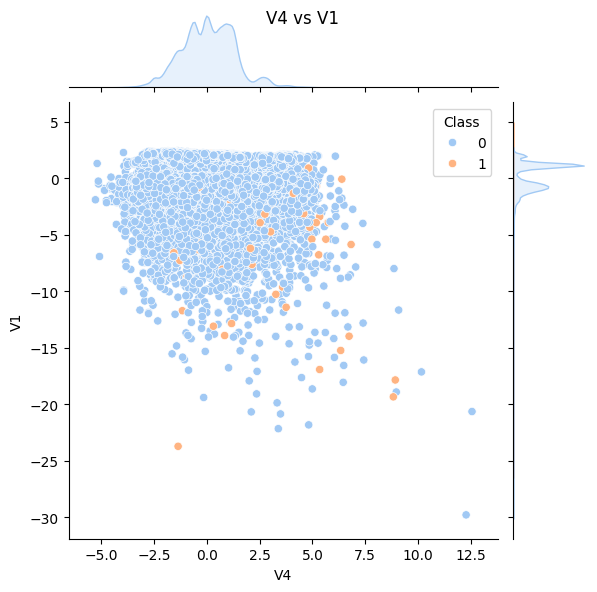

In [64]:

plot = sns.jointplot(x='V4', y='V1',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V4 vs V1")


Text(0.5, 0.98, 'V4 vs Amount')

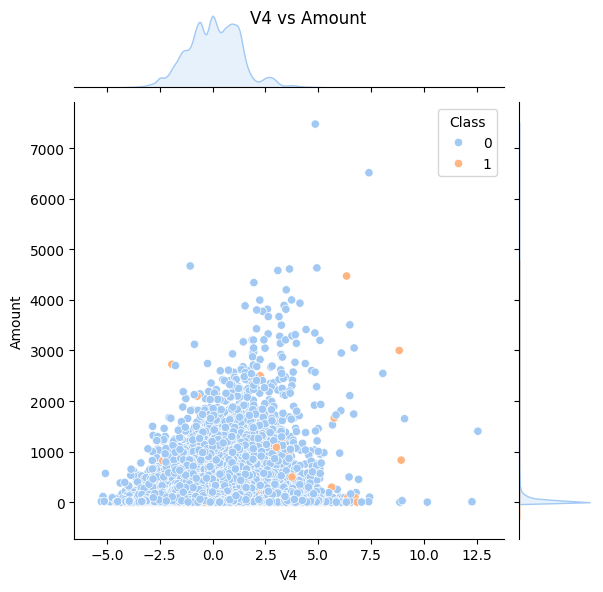

In [65]:
plot = sns.jointplot(x='V4', y='Amount',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V4 vs Amount")



Text(0.5, 0.98, 'V4 vs V7')

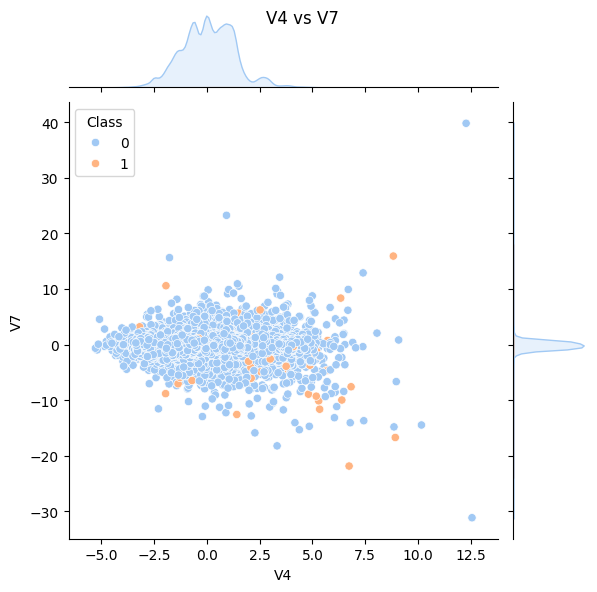

In [66]:
plot = sns.jointplot(x='V4', y='V7',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V4 vs V7")

Text(0.5, 0.98, 'V1 vs Amount')

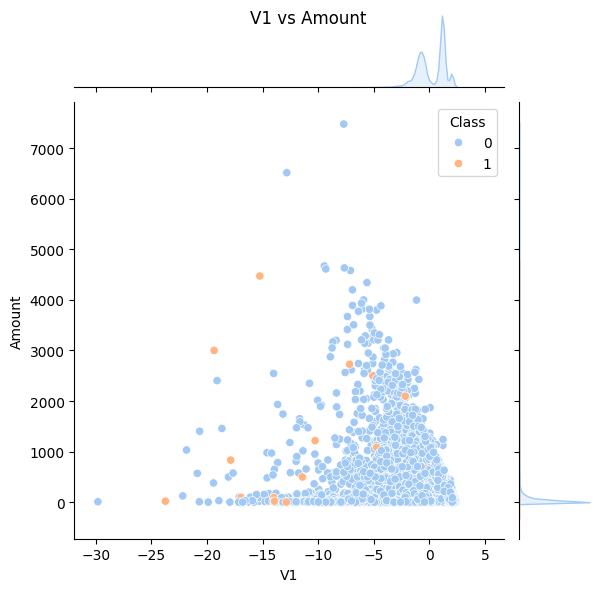

In [67]:

plot = sns.jointplot(x='V1', y='Amount',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V1 vs Amount")



Text(0.5, 0.98, 'V1 vs V7')

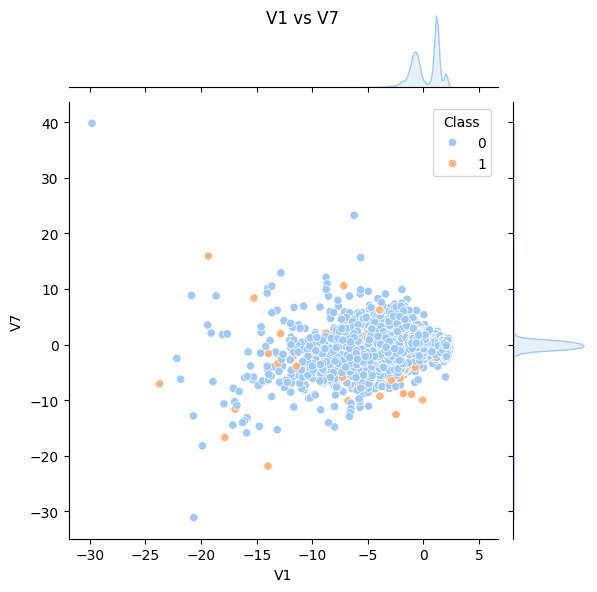

In [68]:
plot = sns.jointplot(x='V1', y='V7',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("V1 vs V7")

Text(0.5, 0.98, 'Amount vs V7')

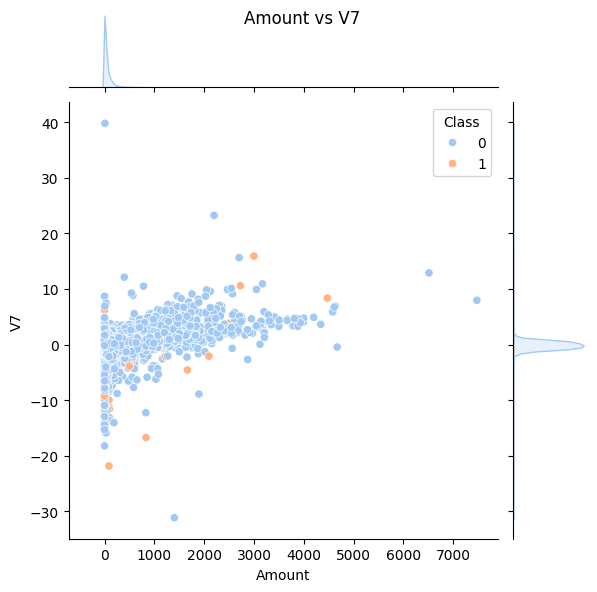

In [69]:

plot = sns.jointplot(x='Amount', y='V7',hue='Class', data=df1, palette ='pastel')
plot.fig.suptitle("Amount vs V7")

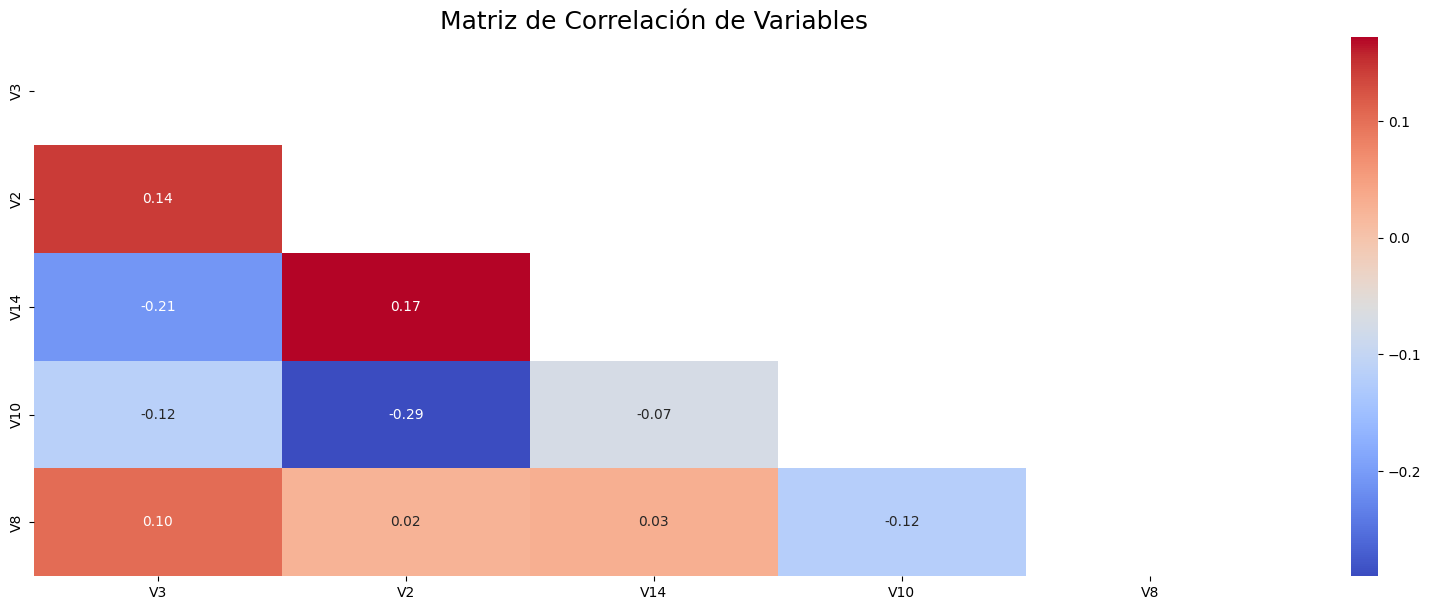

In [71]:
# Seleccionar las variables principales del modelo y evaluar correlación
selected_columns = ['V3', 'V2', 'V14', 'V10', 'V8']
subset_df = df1[selected_columns]

# Crear la matriz de correlación
correlation_matrix = subset_df.corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Ploteo
plt.figure(figsize=(20, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title('Matriz de Correlación de Variables', size=18)
plt.show()

Como puede apreciarse en el gráfico, ningún módulo del valor de correlación entre las 5 principales variables supera el 0.2. Para asumir que existe correlación entre las variables, este debería ser superior a 0.6 por lo que no necesitamos descartar ninguna variable de las seleccionadas por el modelo como de mayor importancia